In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore,norm
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import SelectFromModel
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM


In [ ]:
df = pd.read_csv(r"Complete_Dataset_updated.csv")
print(df.columns)
print(df.describe())


Index(['Date', 'DOY', 'Sample', 'Sub-Sample', 'Lat', 'Long_', 'Sample_type',
       'Animals', 'DM', 'MM', 'Biomass', 'NDF', 'ADF', 'CP', 'TDN_based_ADF',
       'TDN_based_NDF', 'Satellite_Images_Dates', 'B1', 'B2', 'B3', 'B4', 'B5',
       'B6', 'B7', 'B8', 'B8A', 'B9', 'B11', 'B12', 'NDVI', 'NDWI', 'EVI',
       'LAI', 'DVI', 'GCI', 'GEMI', 'SAVI', 'TEMP_MAX', 'TEMP_MIN', 'RAD_SOL',
       'Rainfall', 'WIND_SPD', 'EVAPOT', 'PRES_ATM', 'HUM_REL', 'TP_SFC_AVG',
       'Wind_Dir', 'Dew_Point', 'Radiative_Dif_AVG', 'Radiative_Direct_AVG',
       'PPFD', 'Longwave_Rad_AVG', 'Environmental Suitability Index'],
      dtype='object')
              DOY      Sample  Sub-Sample         Lat       Long_     Animals  \
count  312.000000  312.000000  312.000000  312.000000  312.000000  312.000000   
mean   188.743590   78.500000    1.500000  -20.446665  -54.839072    0.730769   
std    105.721643   45.104737    0.500803    0.000313    0.000352    0.444273   
min     13.000000    1.000000    1.0000

In [3]:
print(df[['Biomass','Rainfall']])

          Biomass  Rainfall
0     2943.000000       0.0
1     2943.000000       0.0
2     2855.333333       0.0
3     2855.333333       0.0
4     3058.666667       0.0
..            ...       ...
307   2261.000000       2.5
308  15634.666670       2.5
309  15634.666670       2.5
310  12139.333330       2.5
311  12139.333330       2.5

[312 rows x 2 columns]


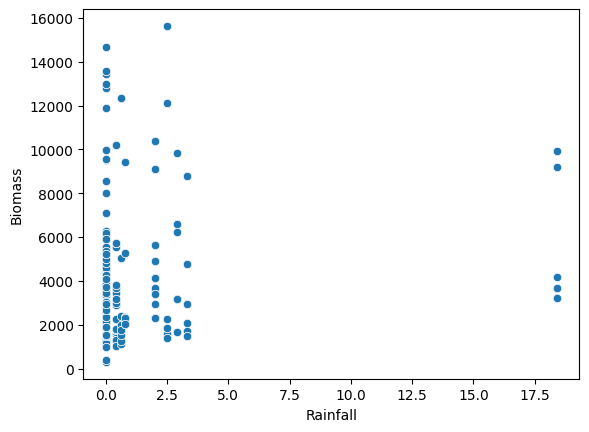

In [4]:
sns.scatterplot(x='Rainfall',y = 'Biomass',data= df)
plt.show()

In [3]:
df["Date"] = pd.to_datetime(df["Date"])

In [4]:
df = df.sort_values(by="Date").reset_index(drop = True)

In [5]:
print(df.iloc[:5,:20])

        Date  DOY  Sample  Sub-Sample        Lat      Long_ Sample_type  \
0 2022-04-06   96      51           2 -20.446152 -54.838854          Q2   
1 2022-04-06   96      51           1 -20.446152 -54.838854          Q2   
2 2022-04-06   96      52           1 -20.446656 -54.839329          Q4   
3 2022-04-06   96      52           2 -20.446656 -54.839329          Q4   
4 2022-04-06   96      53           1 -20.447047 -54.838995          G1   

   Animals         DM        MM      Biomass        NDF        ADF        CP  \
0        1  19.619887  8.906884  2955.000000  71.362299  44.300453  9.670905   
1        1  19.588939  9.199550  2955.000000  72.363017  42.463760  9.586972   
2        1  22.179720  7.476187  3579.000000  73.489034  44.114691  6.639711   
3        1  22.149658  7.198381  3579.000000  73.354798  45.080863  6.117697   
4        1  19.015132  6.819103  3683.666667  70.167399  36.730074  7.962382   

   TDN_based_ADF  TDN_based_NDF  Satellite_Images_Dates    B1    B2 

In [6]:
print(df.iloc[:5,20:40])

     B4    B5    B6    B7    B8   B8A    B9   B11   B12      NDVI      NDWI  \
0  1566  2204  3636  3946  3747  3970  4034  2932  2142  0.410503  0.150391   
1  1566  2204  3636  3946  3747  3970  4034  2932  2142  0.410503  0.150391   
2  1570  2210  3632  3987  3819  3984  4017  2939  2122  0.417332  0.150946   
3  1570  2210  3632  3987  3819  3984  4017  2939  2122  0.417332  0.150946   
4  1518  2224  3838  4327  4138  4357  4034  2970  2163  0.463225  0.189300   

        EVI       LAI   DVI       GCI         GEMI      SAVI  TEMP_MAX  \
0  0.311475  1.008918  2181  1.184840 -4754130.547  0.615696      31.0   
1  0.311475  1.008918  2181  1.184840 -4754130.547  0.615696      31.0   
2  0.319696  1.038661  2249  1.237258 -5055280.910  0.625939      31.0   
3  0.319696  1.038661  2249  1.237258 -5055280.910  0.625939      31.0   
4  0.368367  1.214750  2620  1.444182 -6861171.376  0.694776      31.0   

   TEMP_MIN  RAD_SOL  
0      21.5     21.5  
1      21.5     21.5  
2      21.5

In [7]:
print(df.iloc[:5,40:])


   Rainfall  WIND_SPD  EVAPOT  PRES_ATM    HUM_REL  TP_SFC_AVG    Wind_Dir  \
0       2.0      14.4    4.55   1013.45  75.208333    27.98893  154.666977   
1       2.0      14.4    4.55   1013.45  75.208333    27.98893  154.666977   
2       2.0      14.4    4.54   1013.45  75.208333    27.98893  154.666977   
3       2.0      14.4    4.54   1013.45  75.208333    27.98893  154.666977   
4       2.0      14.4    4.55   1013.45  75.208333    27.98893  154.666977   

   Dew_Point  Radiative_Dif_AVG  Radiative_Direct_AVG        PPFD  \
0  22.131944          55.432106            306.550637  532.417331   
1  22.131944          55.432106            306.550637  532.417331   
2  22.131944          55.432106            306.550637  532.417331   
3  22.131944          55.432106            306.550637  532.417331   
4  22.131944          55.432106            306.550637  532.417331   

   Longwave_Rad_AVG  Environmental Suitability Index  
0        411.760365                         4.527566  
1     

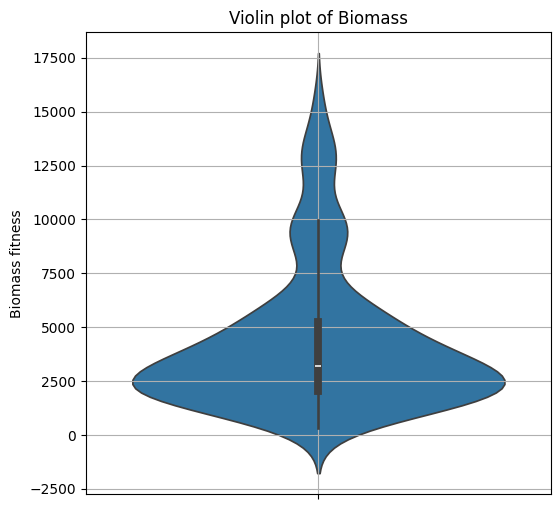

In [8]:
plt.figure(figsize=(6, 6))
# Violin plot for Biomass
sns.violinplot(df["Biomass"])
plt.title('Violin plot of Biomass')
plt.ylabel('Biomass fitness')
plt.grid(True)

plt.show()

Skewness of DM: 0.47619486082405105


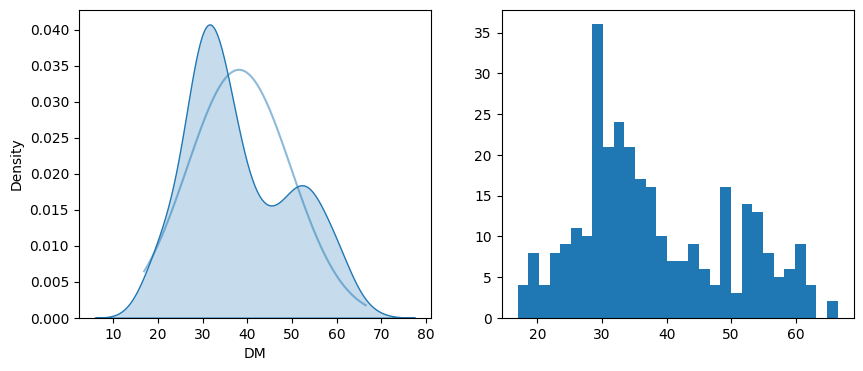

Skewness of MM: 0.04598532680933182


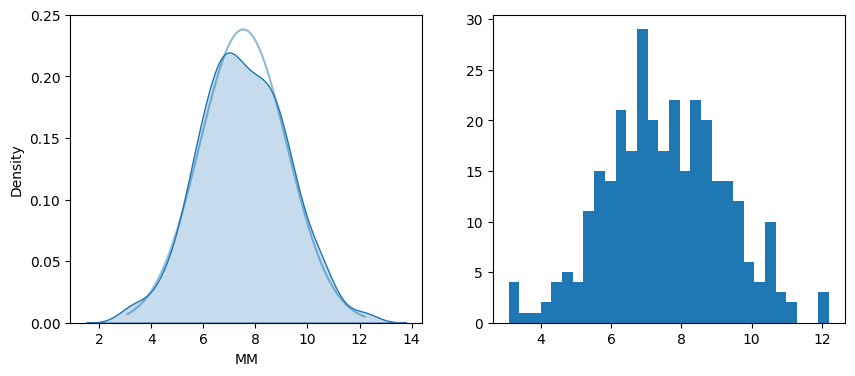

Skewness of Biomass: 1.5560562068349315


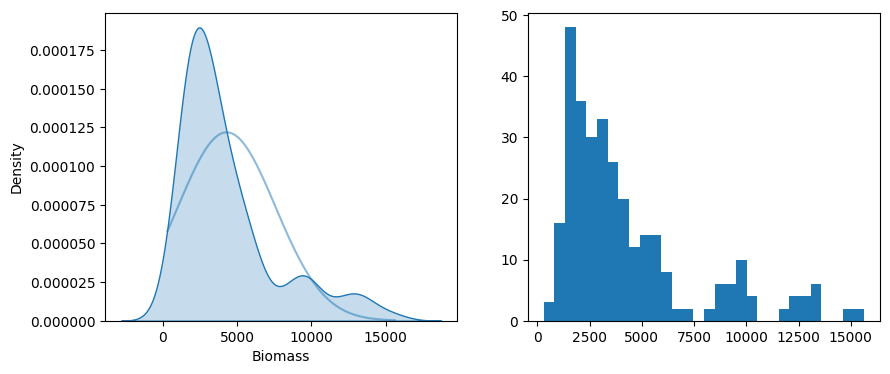

Skewness of NDF: -1.6277514911633137


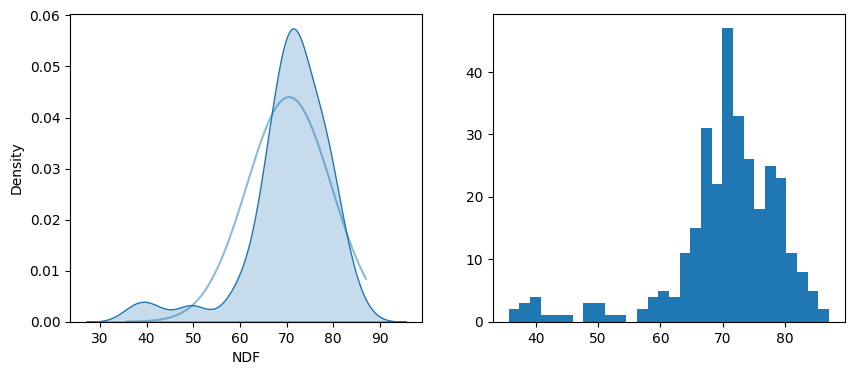

Skewness of ADF: 0.2549759065967965


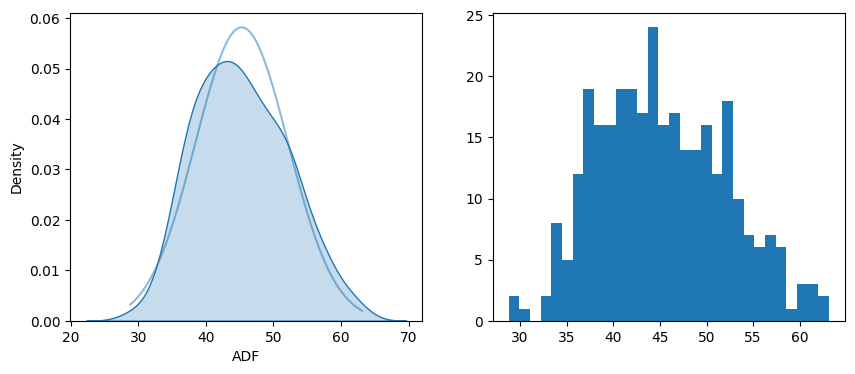

Skewness of CP: 1.0673256668519153


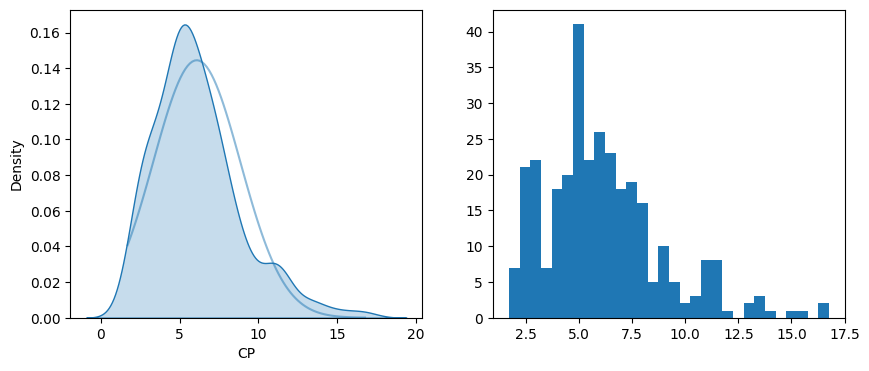

Skewness of TDN_based_ADF: -0.2549759064619162


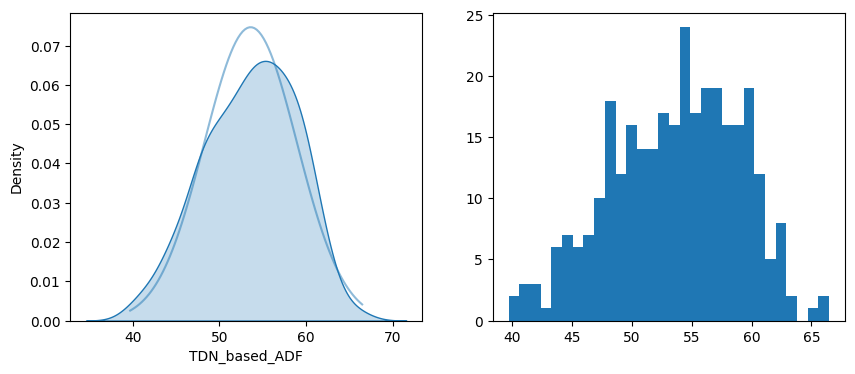

Skewness of TDN_based_NDF: 1.627751491459774


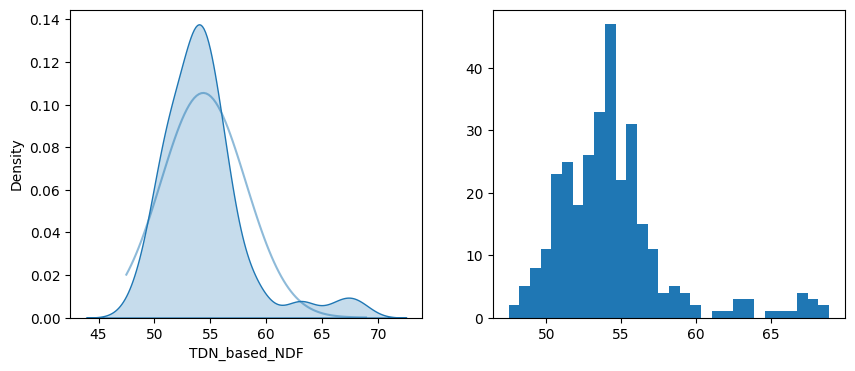

Skewness of B1: 1.6098021975618029


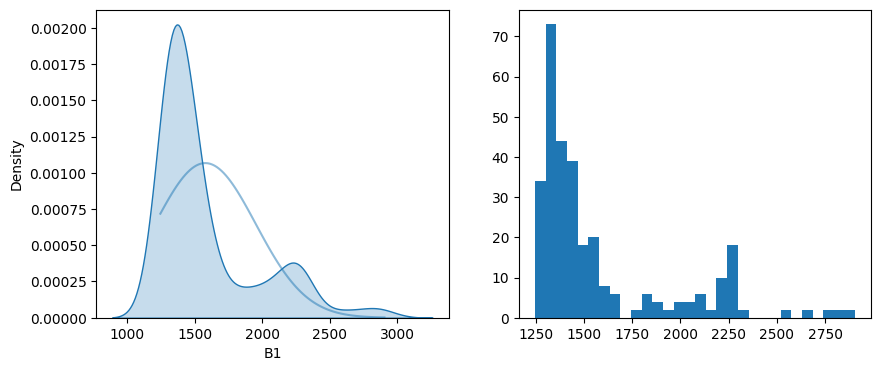

Skewness of B2: 1.8302077693340857


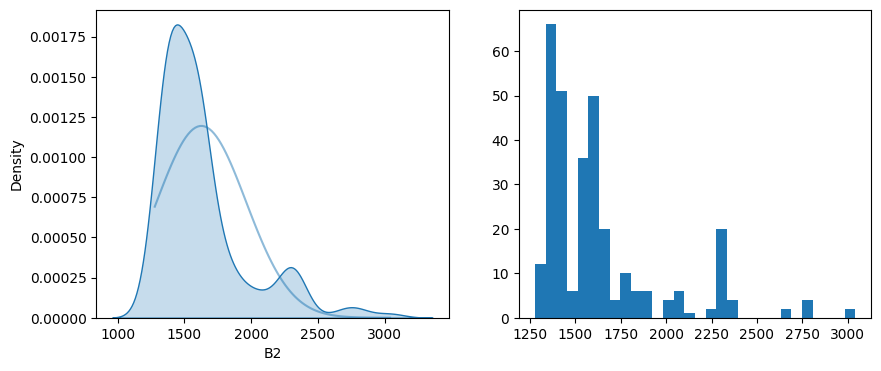

Skewness of B3: 1.7093872827172236


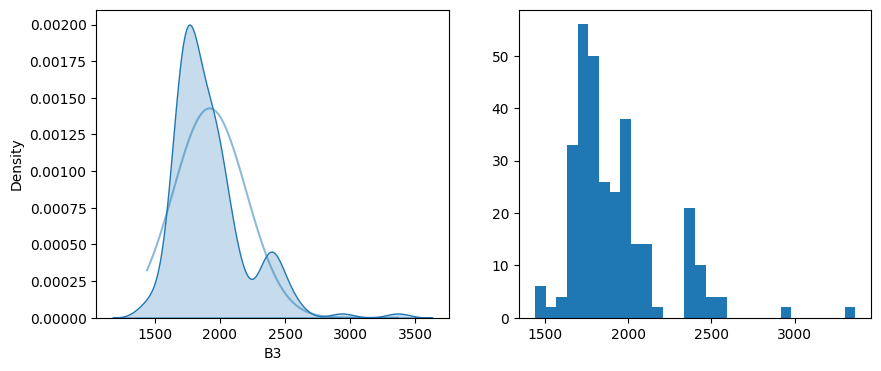

Skewness of B4: 0.6516258608162716


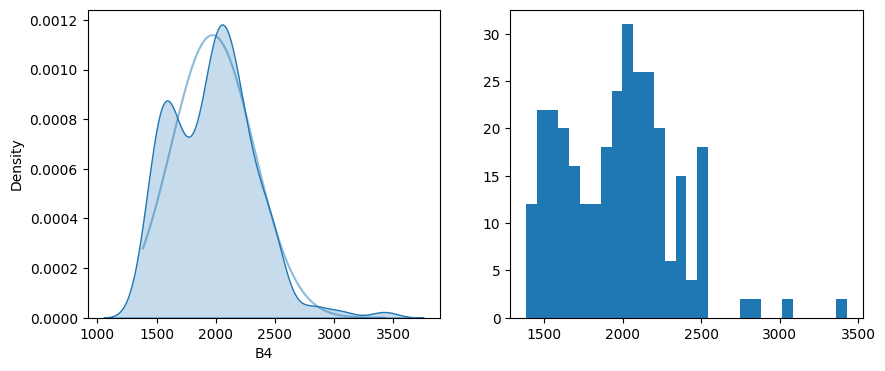

Skewness of B5: 0.4425256117981182


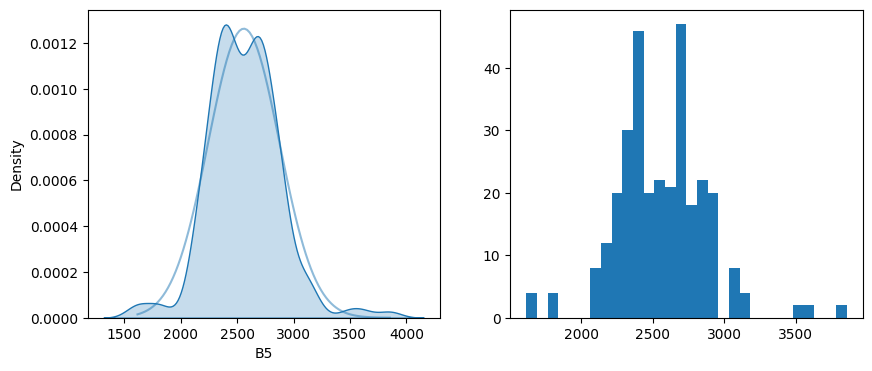

Skewness of B6: -0.6199174274057961


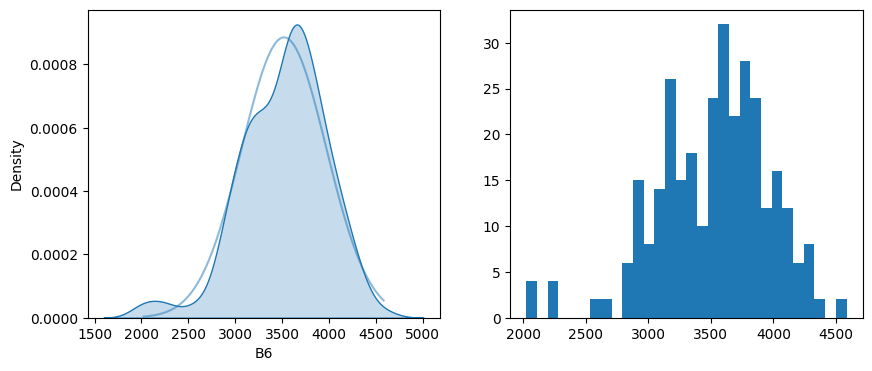

Skewness of B7: -0.6777508202999565


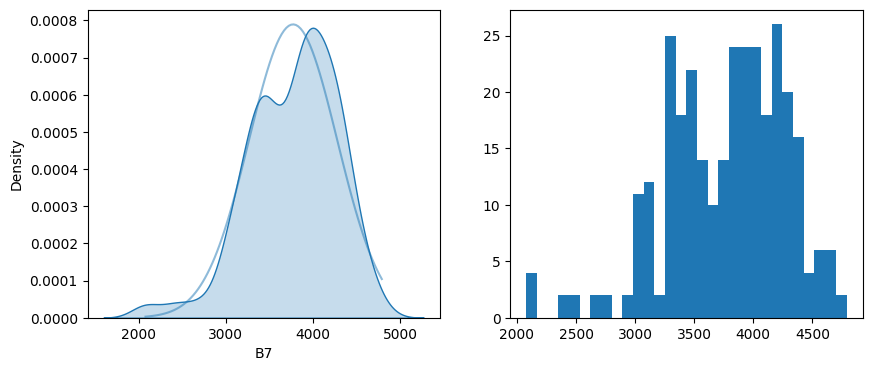

Skewness of B8: -0.7129909739124821


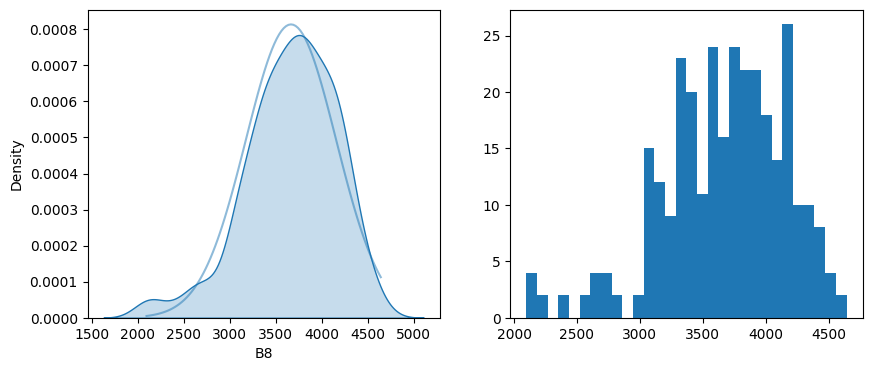

Skewness of B8A: -0.8412775265492446


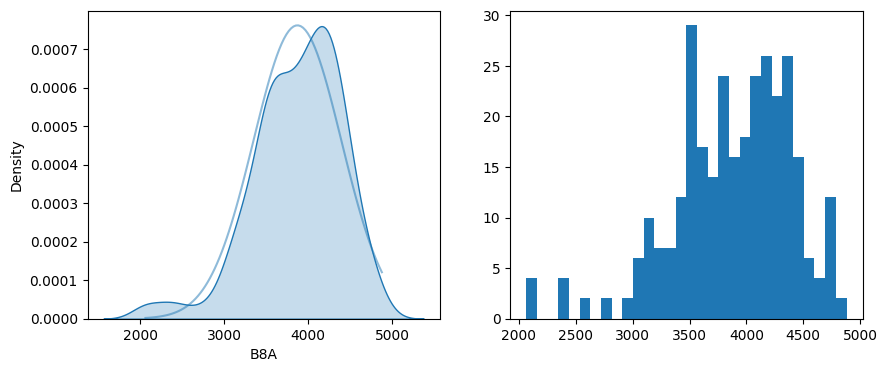

Skewness of B9: 1.7606111120064682


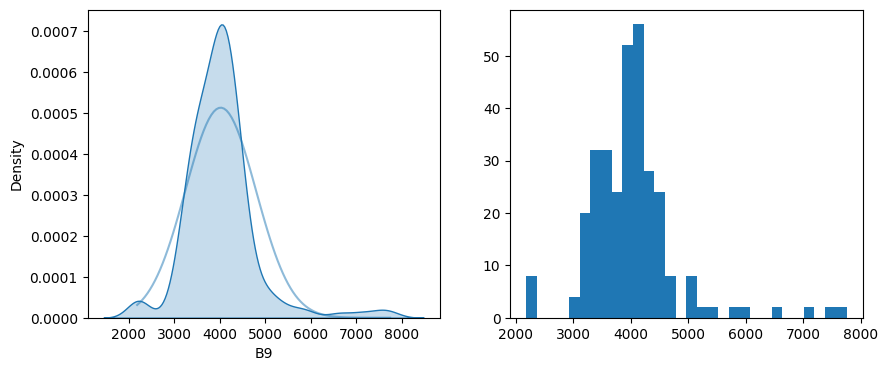

Skewness of B11: -0.7552209453566656


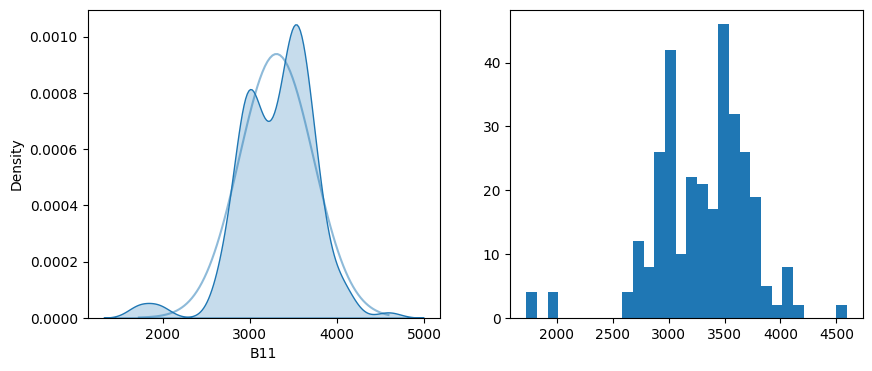

Skewness of B12: -0.4119707759287285


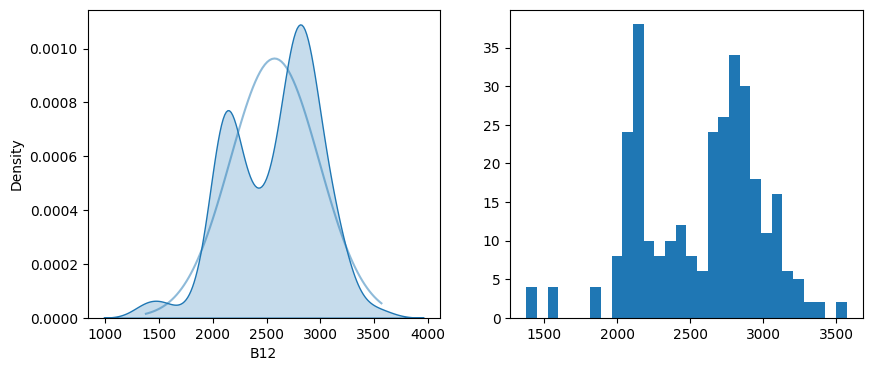

Skewness of NDVI: -0.03357864571420512


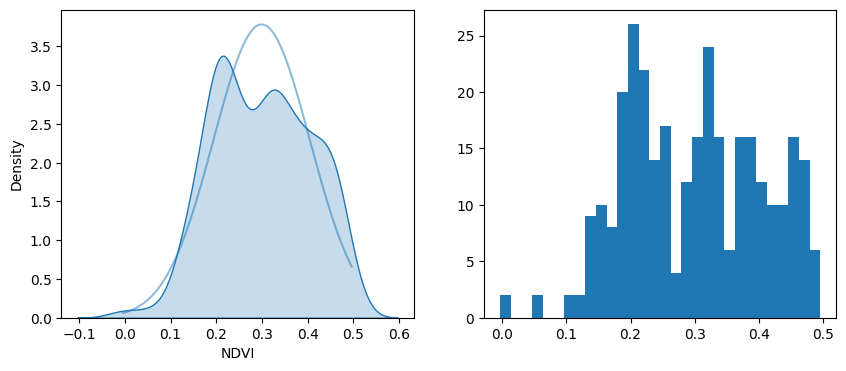

Skewness of NDWI: 0.1775224760050724


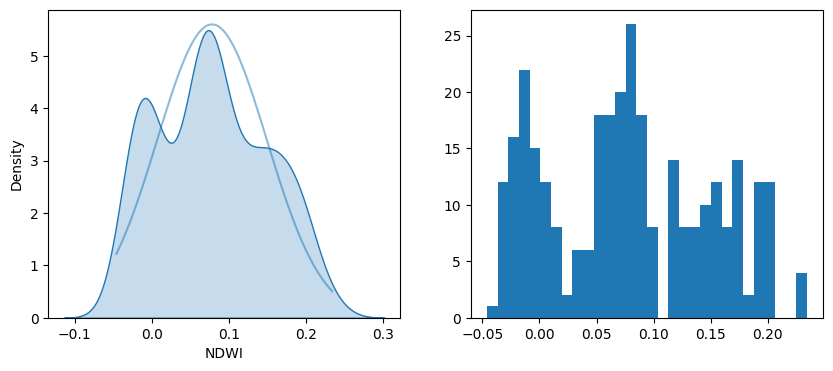

Skewness of EVI: -0.019119053821374916


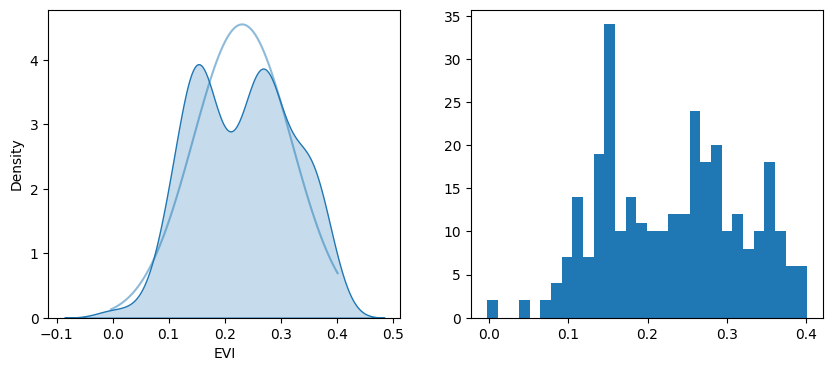

Skewness of LAI: -0.019119052418863206


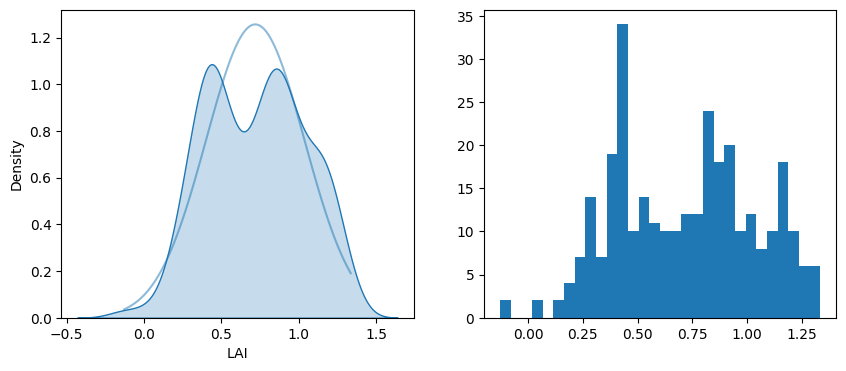

Skewness of DVI: -0.1602951142659571


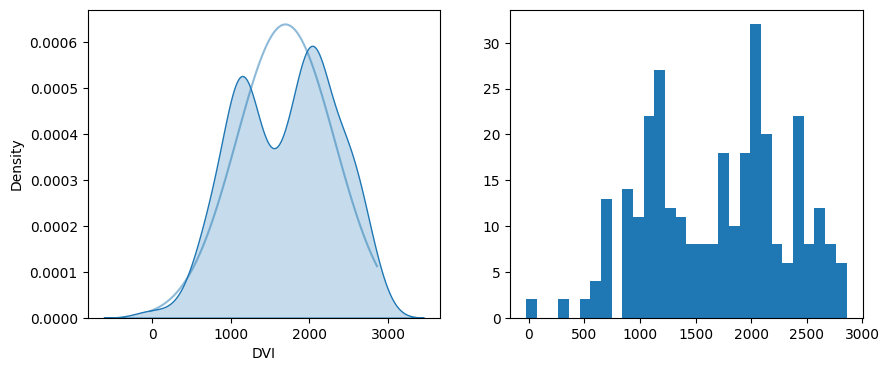

Skewness of GCI: -0.23980037579443161


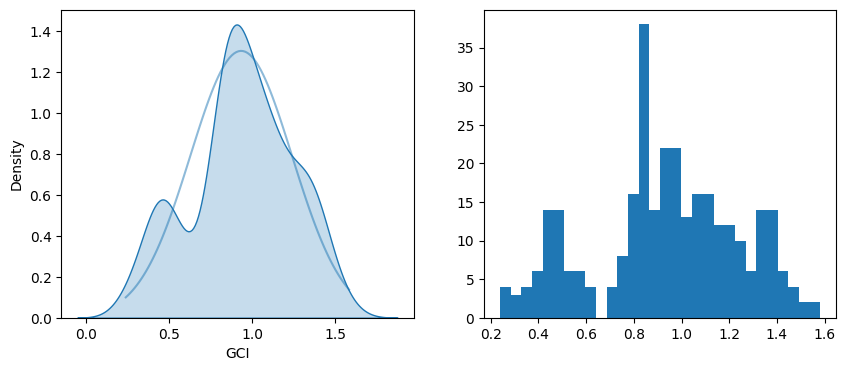

Skewness of GEMI: -0.40430269787719136


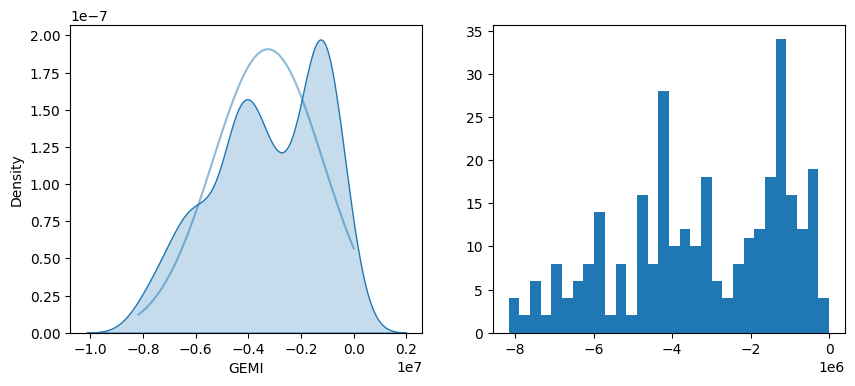

Skewness of SAVI: -0.033587817096671864


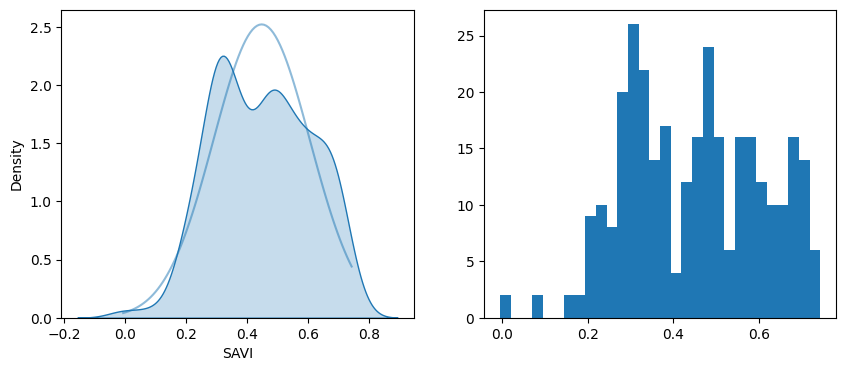

Skewness of TEMP_MAX: -0.45540033875057057


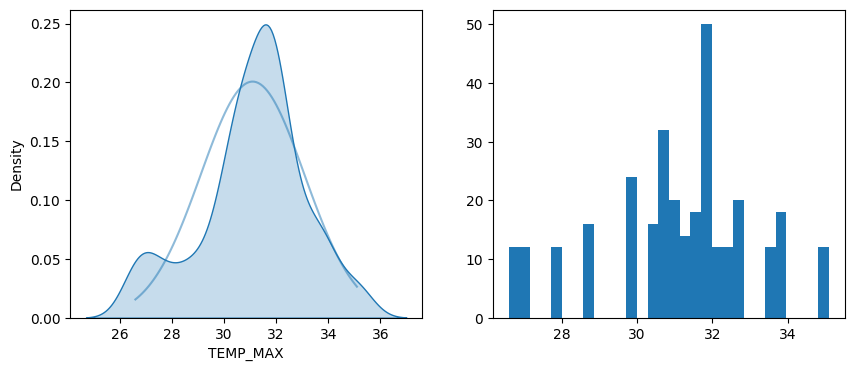

Skewness of TEMP_MIN: -0.3907506430343448


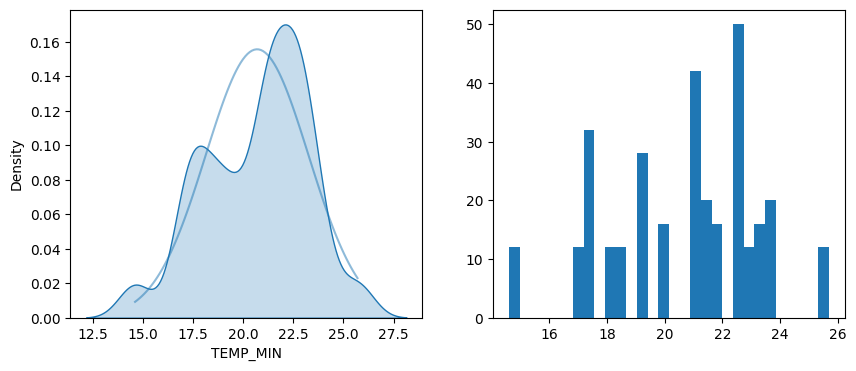

Skewness of RAD_SOL: -0.11699166170064944


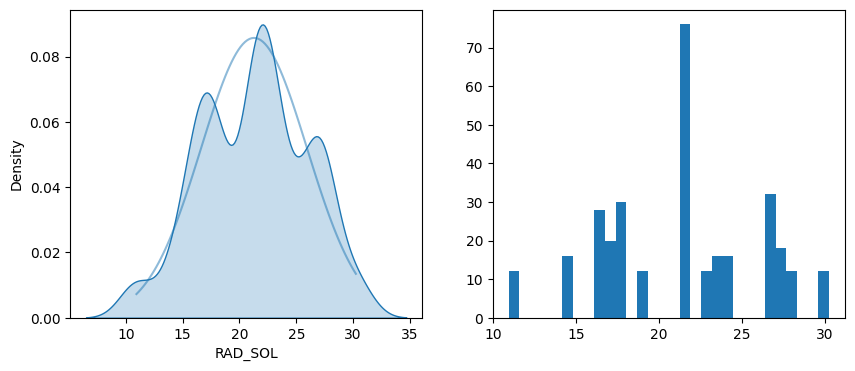

Skewness of Rainfall: 4.277774565116747


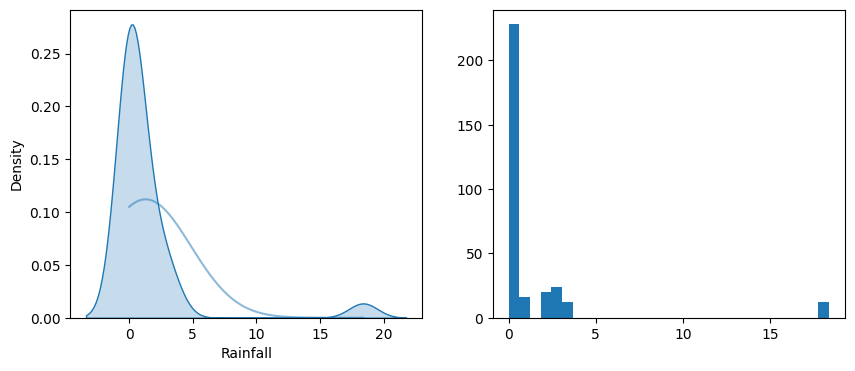

Skewness of WIND_SPD: 0.282944769805031


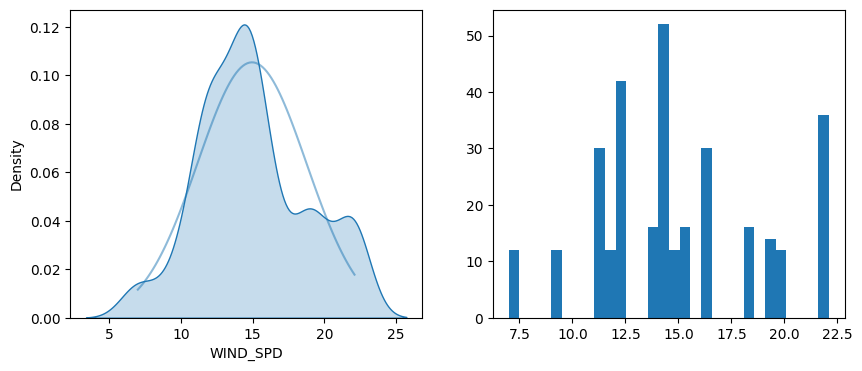

Skewness of EVAPOT: 0.21392577400645618


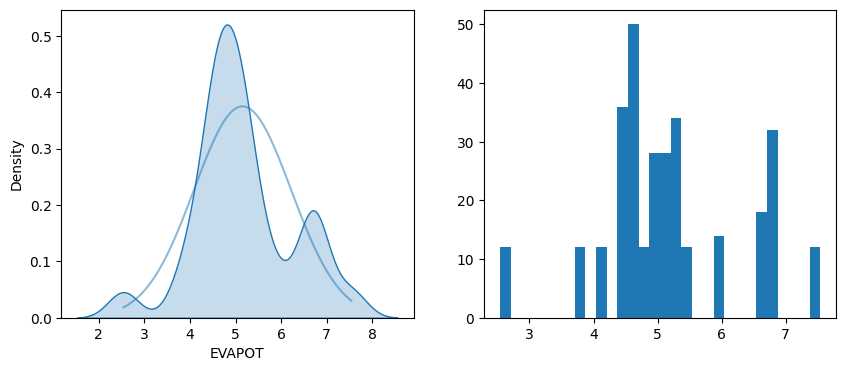

Skewness of PRES_ATM: -1.0704460730347092


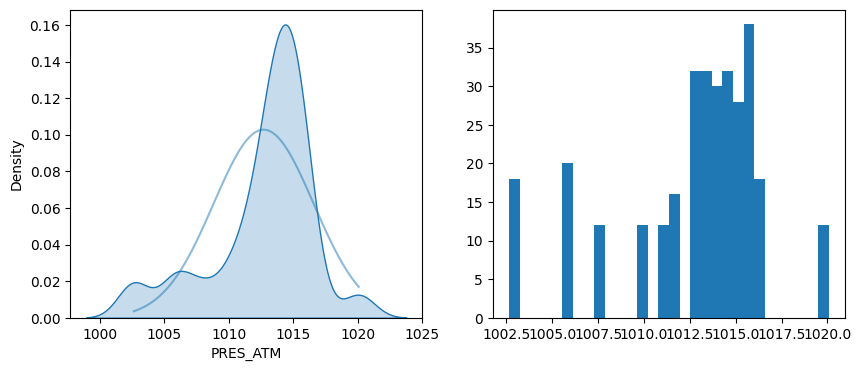

Skewness of HUM_REL: -0.26984262075879906


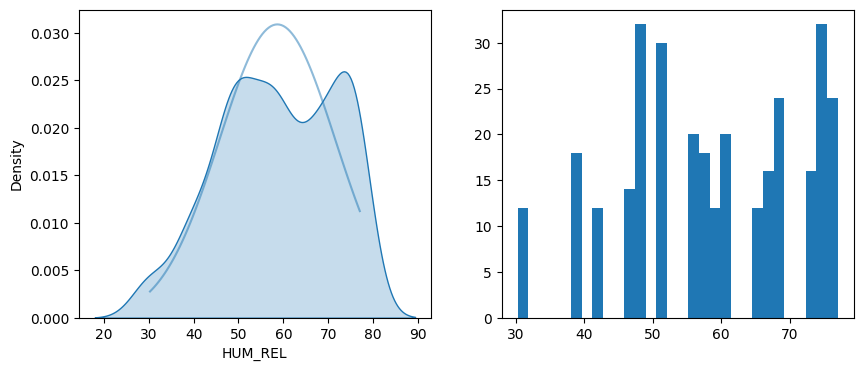

Skewness of TP_SFC_AVG: -0.17560193570520258


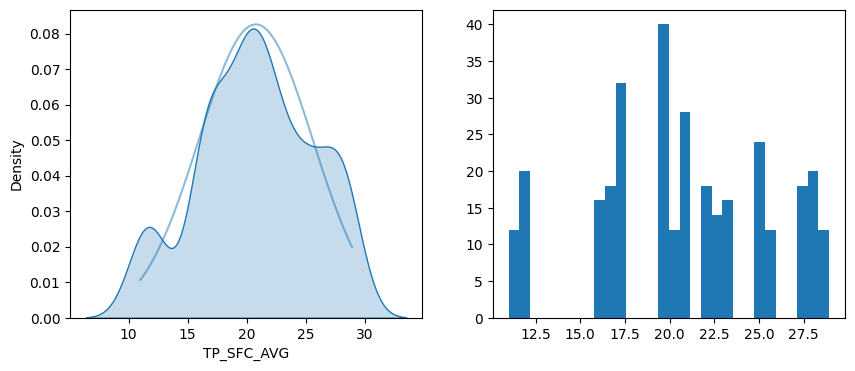

Skewness of Wind_Dir: -0.030429404119172245


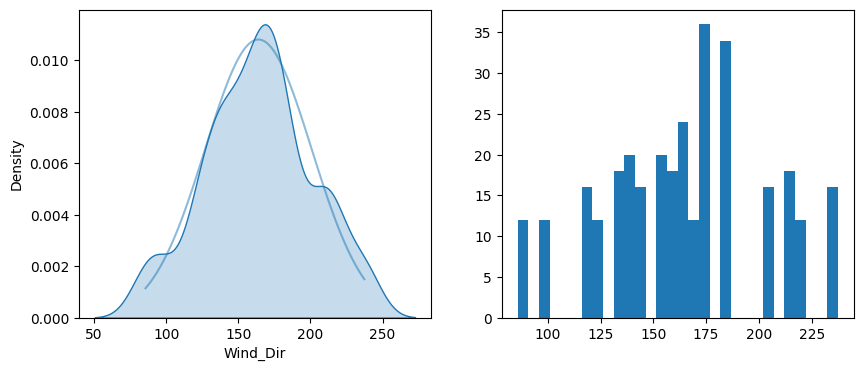

Skewness of Dew_Point: 0.027723447083707553


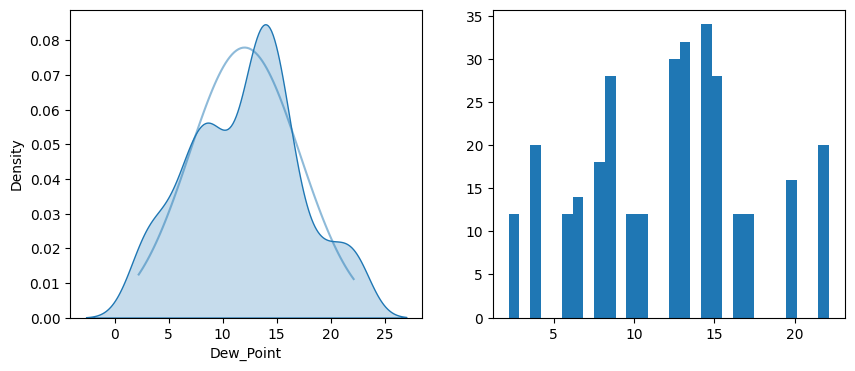

Skewness of Radiative_Dif_AVG: 2.4148296259935744


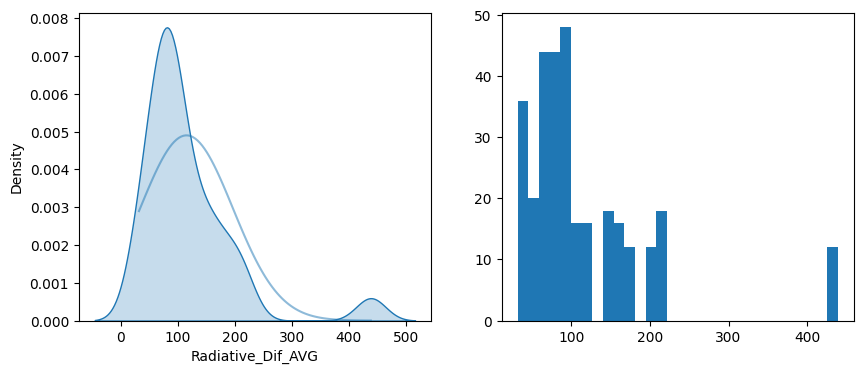

Skewness of Radiative_Direct_AVG: -0.031062643995763205


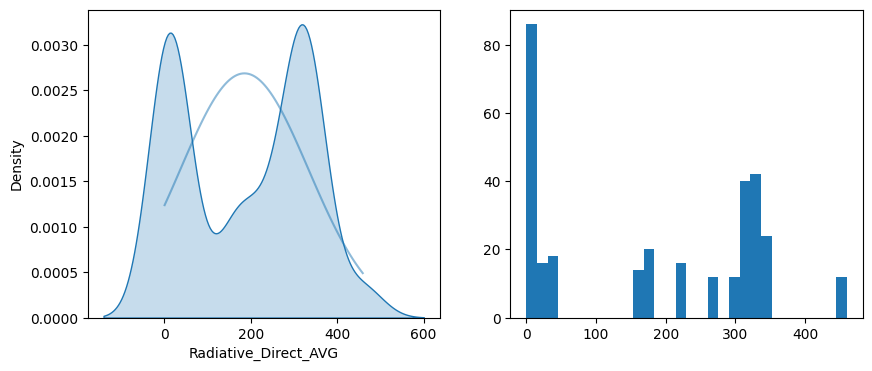

Skewness of PPFD: 1.4032935237629411


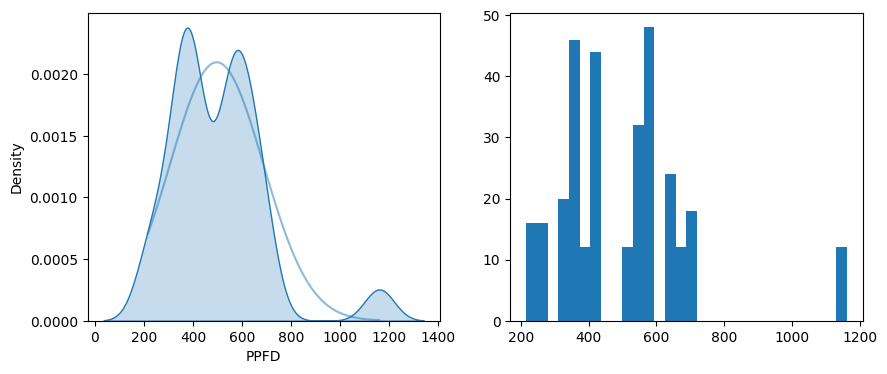

Skewness of Longwave_Rad_AVG: -0.9870323819191911


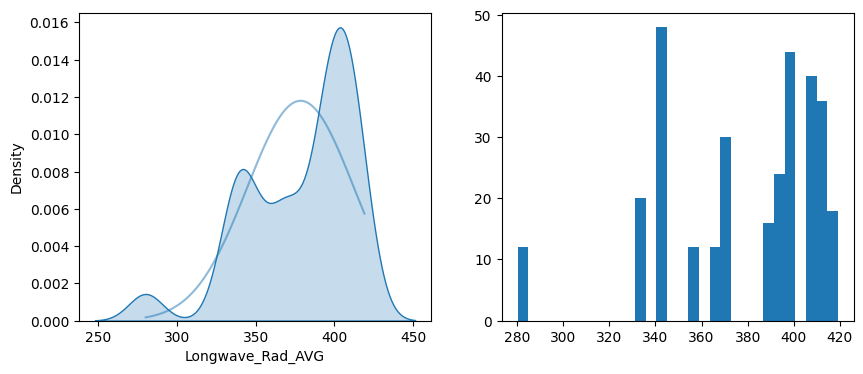

Skewness of Environmental Suitability Index: 2.244678609857007


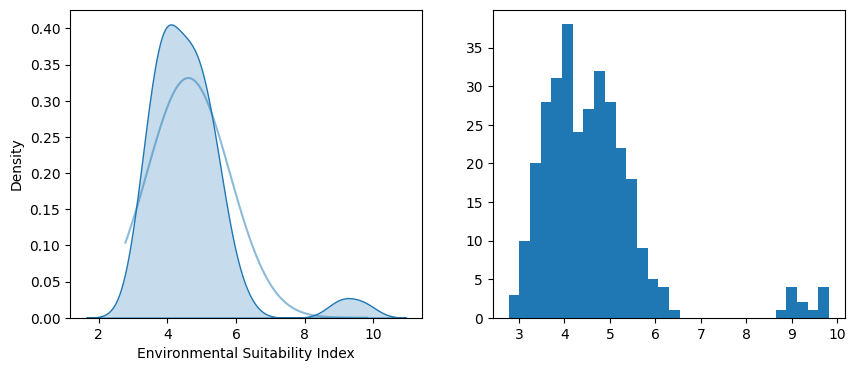

In [9]:
columns_to_drop = ["Sample", "Sub-Sample", "Lat", "Long_", "Animals", "Satellite_Images_Dates","DOY"]
numerical_df = df.select_dtypes('number').drop(columns_to_drop, axis=1)
def check_skueness():
    for i in numerical_df.columns:
        print(f'Skewness of {i}: {numerical_df[i].skew()}')
        plt.figure(figsize=(10,4))
        plt.subplot(1, 2, 1)
        sns.kdeplot(numerical_df[i], fill=True)
        x = np.linspace(min(numerical_df[i]), max(numerical_df[i]), 100)
        plt.plot(x, norm.pdf(x, np.mean(numerical_df[i]), np.std(numerical_df[i])),alpha=0.5)
        plt.subplot(1, 2, 2)
        plt.hist(numerical_df[i], bins=30)
        plt.show()
check_skueness()

In [ ]:
df_Animals = pd.concat([numerical_df, df[['Date', 'Animals']]], axis=1)

df_with_Animals = df_Animals.loc[df_Animals['Animals'] == 1]
df_without_Animals = df_Animals.loc[df_Animals['Animals'] == 0]

z_score_columns = ['MM', 'ADF', 'TDN_based_ADF', 'Wind_Dir']
z_score_df = df_with_Animals[z_score_columns]

z_scores = z_score_df.apply(zscore)
outlier_mask = (z_scores.abs() > 3)
print('Z-score outliers')
print(outlier_mask.sum())

outliers_columns = [column for column in outlier_mask if outlier_mask[column].sum() > 0]

IQR_df = df_with_Animals.drop(columns=z_score_columns + ['Date','Animals'])
Q1 = IQR_df.quantile(0.25)
Q3 = IQR_df.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outlier_mask = (IQR_df < lower_bound) | (IQR_df > upper_bound)
print('IQR outliers')
print(outlier_mask.sum())

for column in outlier_mask.columns:
    if outlier_mask[column].sum() > 0:
        outliers_columns.append(column)
    
print(outliers_columns)

Z-score outliers
MM               0
ADF              2
TDN_based_ADF    2
Wind_Dir         0
dtype: int64
IQR outliers
DM                                  5
Biomass                             0
NDF                                14
CP                                 11
TDN_based_NDF                      14
B1                                 36
B2                                 29
B3                                 14
B4                                  4
B5                                 10
B6                                  4
B7                                  4
B8                                  6
B8A                                 8
B9                                 18
B11                                10
B12                                 0
NDVI                                0
NDWI                                0
EVI                                 0
LAI                                 0
DVI                                 0
GCI                                 5
GEMI   

'\ncleaned_data = pd.concat([cleaned_with_Animals, df_without_Animals], axis=0)\ncleaned_data = cleaned_data.sort_values(by=\'Date\').reset_index(drop=True)\n\nprint("Cleaned Data (First Few Rows):")\nprint(cleaned_data.head())\n'

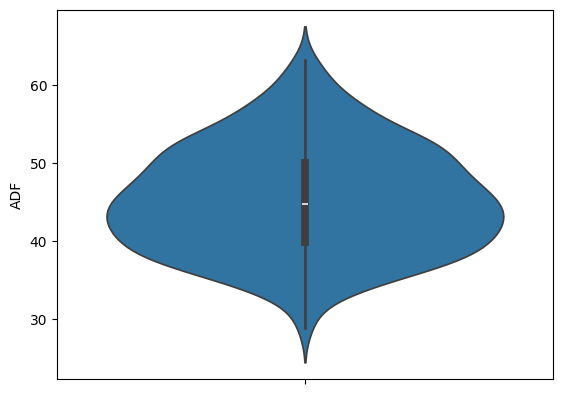

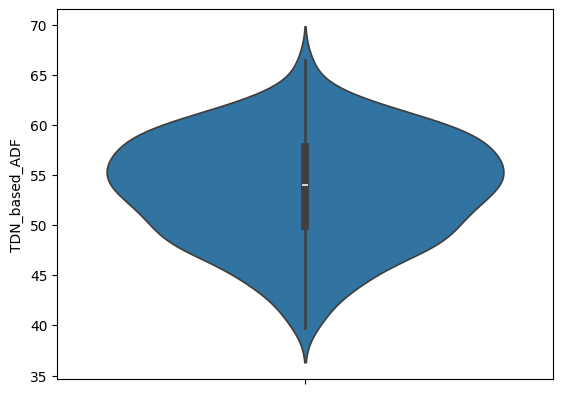

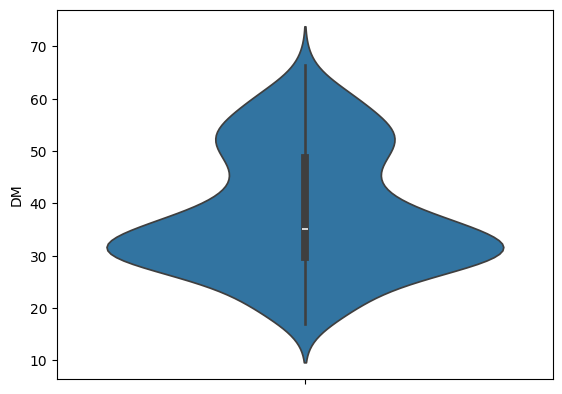

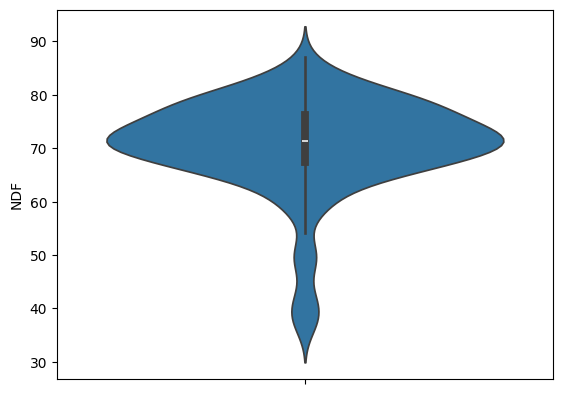

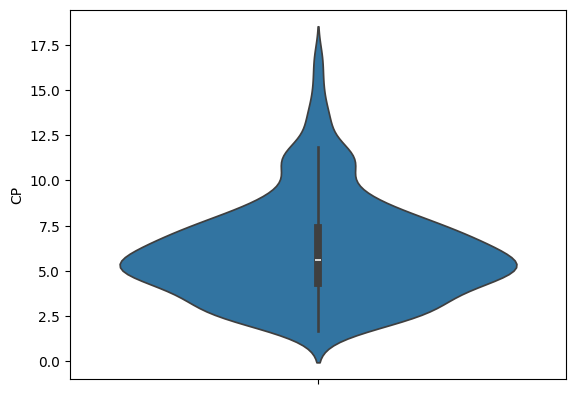

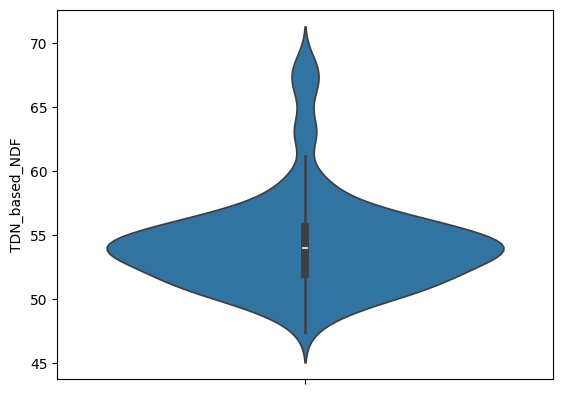

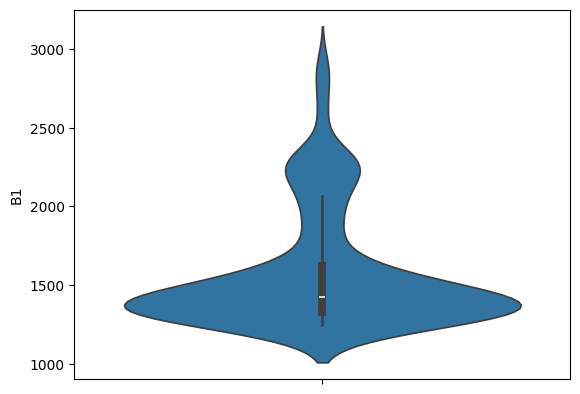

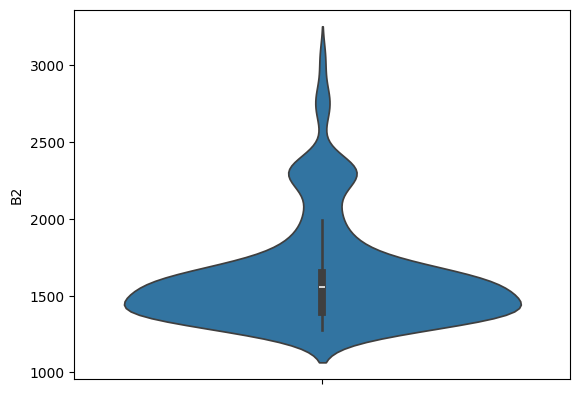

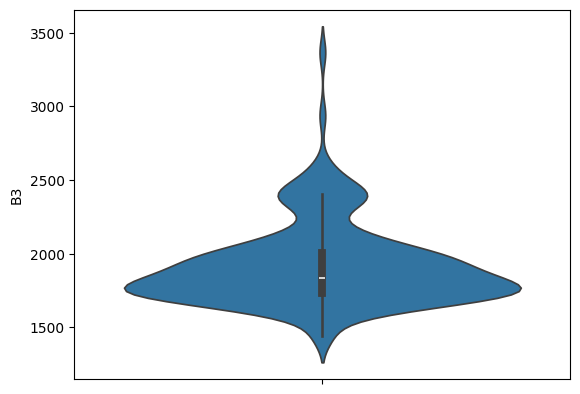

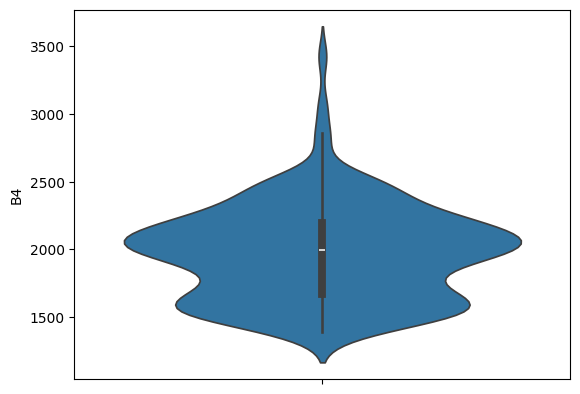

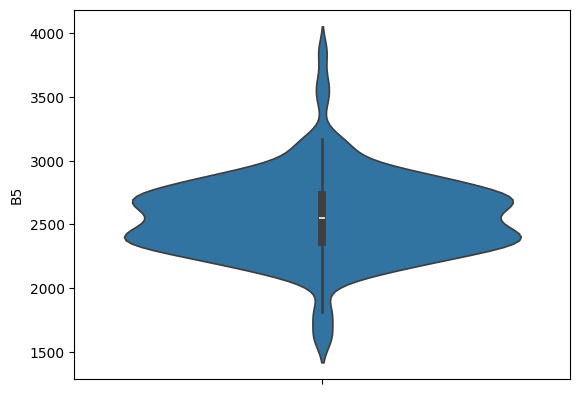

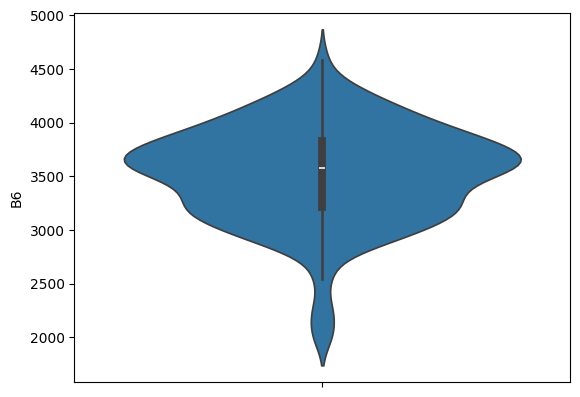

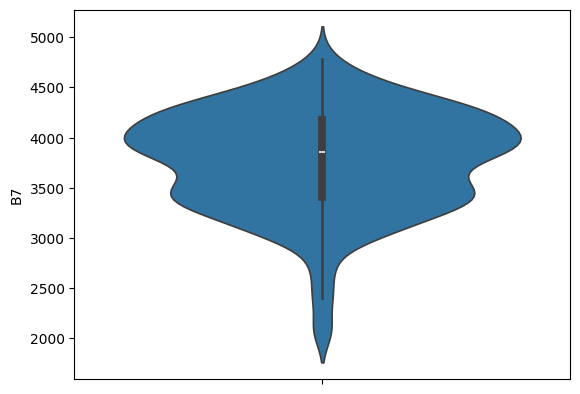

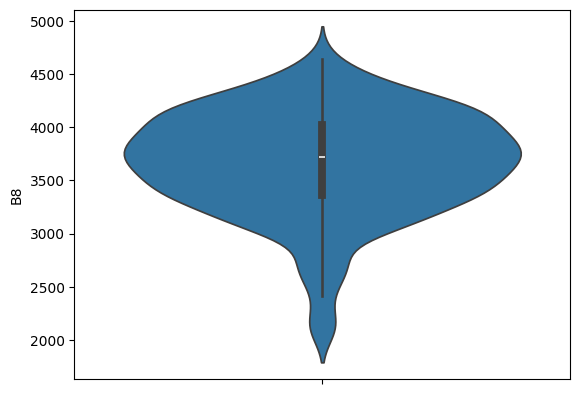

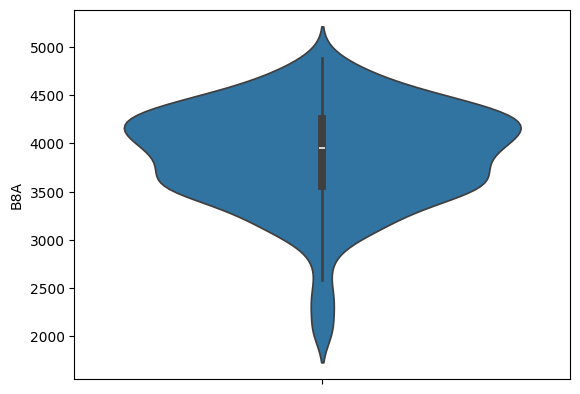

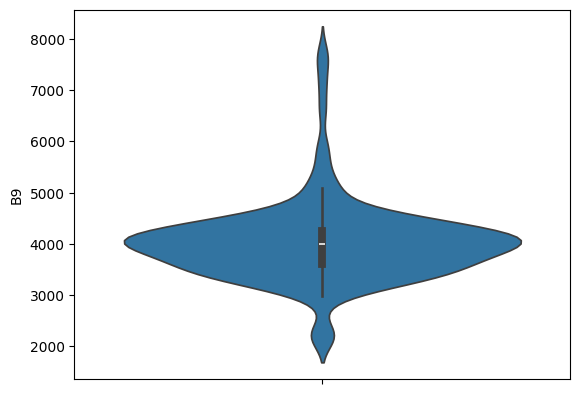

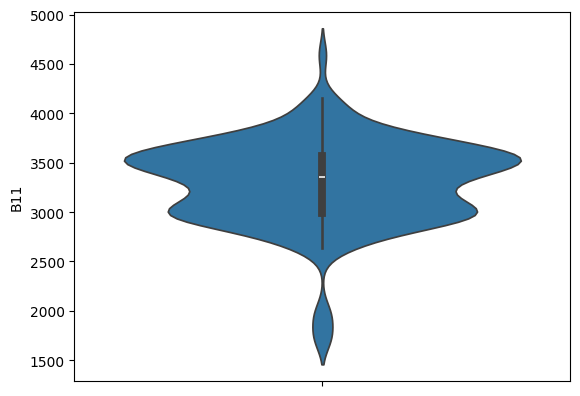

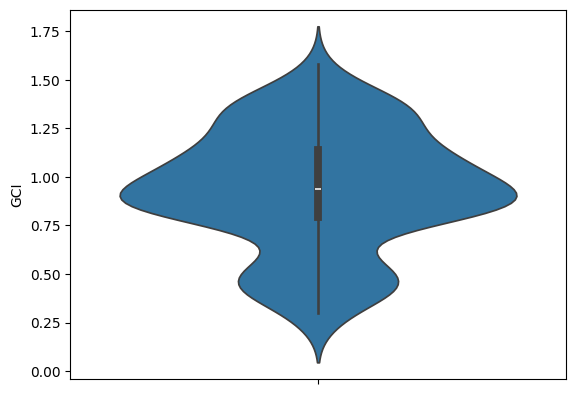

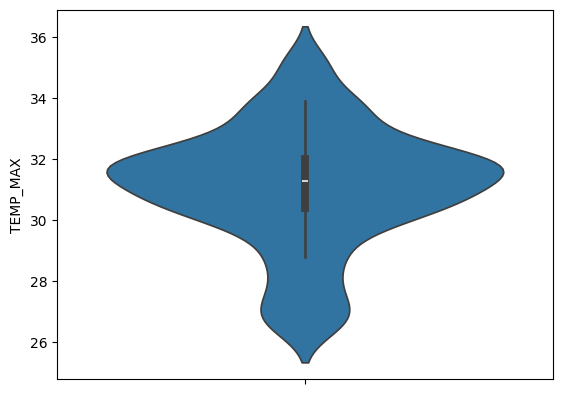

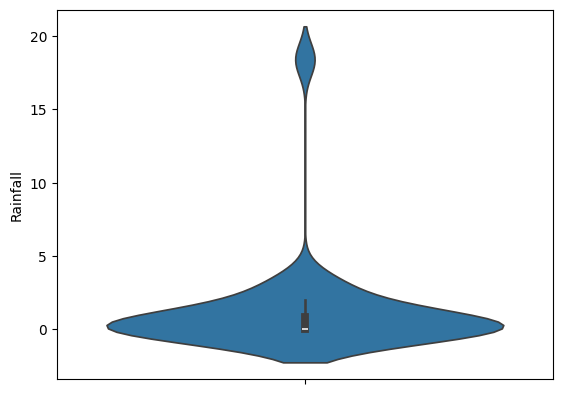

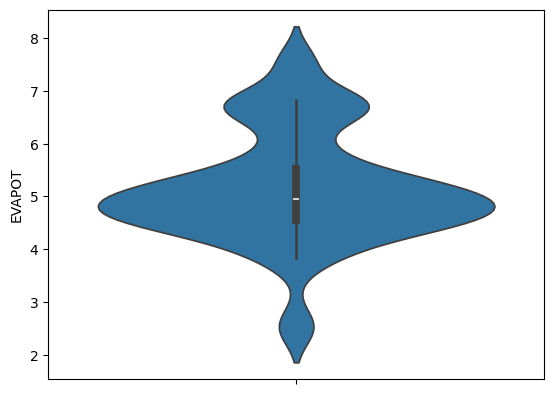

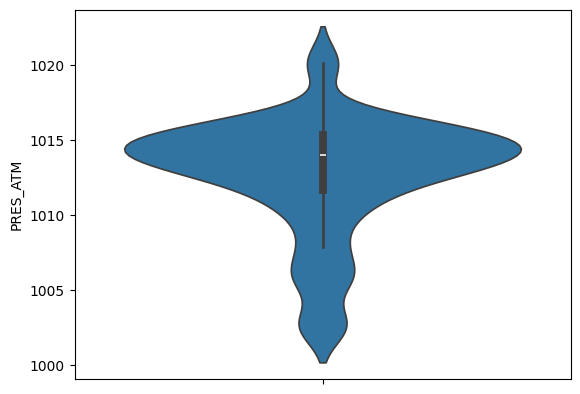

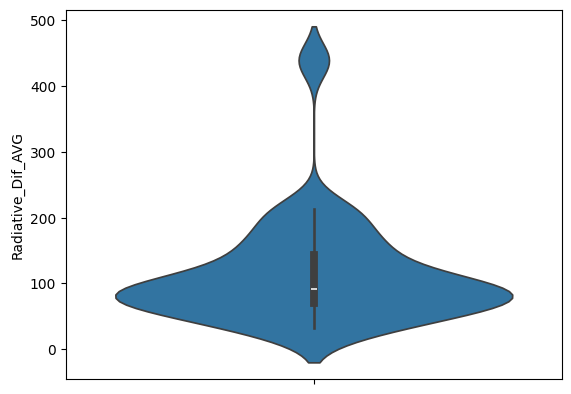

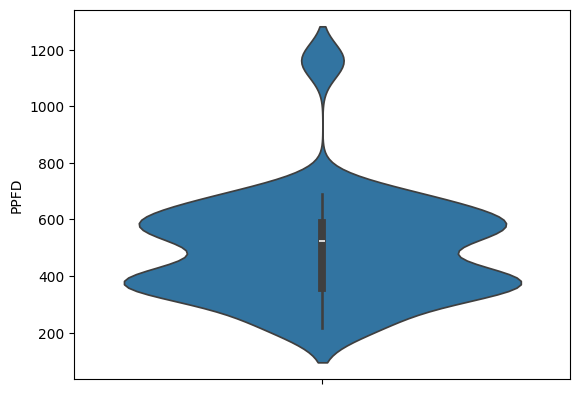

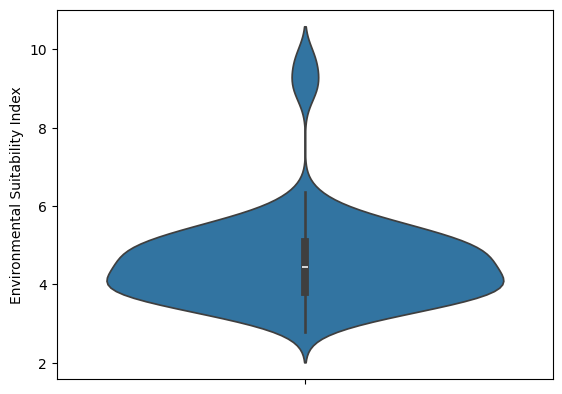

In [11]:
for column in outliers_columns:
    sns.violinplot(df_Animals[column])
    plt.show()


In [12]:
handled_columns = ['B3','B4']
df_with_Animals.loc[outlier_mask['B3'], 'B3'] = df_with_Animals['B3'].mean()
df_with_Animals.loc[outlier_mask['B4'], 'B4'] = df_with_Animals['B4'].median()

C:\Users\User\AppData\Local\Temp\ipykernel_24360\3399150637.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1919.0087719298247' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_with_Animals.loc[outlier_mask['B3'], 'B3'] = df_with_Animals['B3'].mean()


In [13]:
cleaned_data = pd.concat([df_with_Animals, df_without_Animals], axis=0)
cleaned_data = cleaned_data.sort_values(by='Date').reset_index(drop=True)

In [14]:
cleaned_data.iloc[290:,:]

DM         MM       Biomass        NDF        ADF         CP  \
290  26.270464   8.297252   2026.333333  62.838332  36.283221  11.408907   
291  28.496459   8.423898   9405.333333  64.689902  52.617953   4.206733   
292  35.178421  10.526670   5292.000000  40.199335  43.340249  11.228465   
293  35.117201  10.431176   5292.000000  40.668069  42.763686  11.126144   
294  26.292084   8.528563   2026.333333  63.364175  36.239400  11.175150   
295  28.192596   9.624454   2156.666667  63.208469  34.146600  13.641734   
296  24.240450   9.245660   2295.333333  67.106082  33.860867  10.852891   
297  28.555895  12.137282   2054.333333  59.969084  37.816570   4.660371   
298  35.672718  10.268633   2376.666667  68.920267  39.806081  10.756933   
299  24.249660   8.951962   2295.333333  67.096402  34.031541  11.097978   
300  32.022107  11.254015   2261.000000  49.133486  41.469091   7.692826   
301  31.915926  10.798575   2261.000000  48.798779  40.637087   7.922138   
302  33.206511   7.461658   1851.000000  70.354575  61.318208   7.938423   
303  30.580012   8.095936   1387.666667  71.103831  40.670618   9.260928   
304  30.582108   8.228557   1387.666667  70.496184  41.748501   9.042283   
305  29.200845   6.621608   1562.666667  48.982005  38.216729   5.372266   
306  29.255581   6.339402   1562.666667  49.478955  39.428206   5.148422   
307  33.284583   7.614034   1851.000000  70.104889  61.333716   7.726366   
308  43.740695   8.313133  12139.333330  76.160698  46.191561   2.941602   
309  45.493257   8.218142  15634.666670  60.697330  45.194175   8.190470   
310  45.505167   8.263333  15634.666670  59.758212  44.775544   7.958124   
311  43.878248   8.412285  12139.333330  75.213481  46.535897   3.167879   

     TDN_based_ADF  TDN_based_NDF    B1    B2  ...  TP_SFC_AVG    Wind_Dir  \
290      60.635371      57.580132  1616  1649  ...   19.510337  205.398087   
291      47.910615      56.807842  1624  1625  ...   19.510337  205.398087   
292      55.137946      67.022857  1648  1554  ...   19.510337  205.398087   
293      55.587089      66.827348  1648  1554  ...   19.510337  205.398087   
294      60.669507      57.360802  1616  1649  ...   19.510337  205.398087   
295      62.299798      57.425747  1573  1653  ...   19.510337  205.398087   
296      62.522384      55.800053  1603  1635  ...   19.510337  205.398087   
297      59.440892      58.776895  1566  1647  ...   19.510337  205.398087   
298      57.891063      55.043357  1621  1604  ...   19.510337  205.398087   
299      62.389430      55.804091  1603  1635  ...   19.510337  205.398087   
300      56.595578      63.296423  1255  1383  ...   19.443586  124.981135   
301      57.243710      63.436029  1255  1383  ...   19.443586  124.981135   
302      41.133116      54.445107  1246  1378  ...   19.443586  124.981135   
303      57.217588      54.132592  1320  1373  ...   19.443586  124.981135   
304      56.377918      54.386041  1320  1373  ...   19.443586  124.981135   
305      59.129168      63.359606  1295  1397  ...   19.443586  124.981135   
306      58.185428      63.152328  1295  1397  ...   19.443586  124.981135   
307      41.121035      54.549251  1246  1378  ...   19.443586  124.981135   
308      52.916774      52.023373  1313  1343  ...   19.443586  124.981135   
309      53.693738      58.473144  1303  1328  ...   19.443586  124.981135   
310      54.019852      58.864850  1303  1328  ...   19.443586  124.981135   
311      52.648536      52.418457  1313  1343  ...   19.443586  124.981135   

     Dew_Point  Radiative_Dif_AVG  Radiative_Direct_AVG        PPFD  \
290  15.243750         124.599408            222.349822  580.688169   
291  15.243750         124.599408            222.349822  580.688169   
292  15.243750         124.599408            222.349822  580.688169   
293  15.243750         124.599408            222.349822  580.688169   
294  15.243750         124.599408            222.349822  580.688169   
295  15.243750         124.599408         

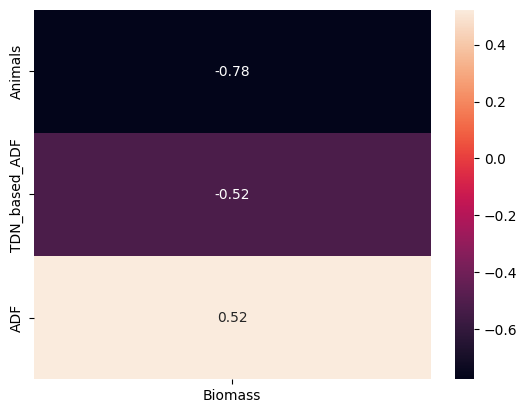

In [15]:
biomass_corr=cleaned_data.corr().loc[:,["Biomass"]].sort_values(by="Biomass").drop("Biomass")
biomass_corr= biomass_corr[abs(biomass_corr["Biomass"])>=0.5]
sns.heatmap(data=biomass_corr,annot=True)
plt.show()

In [16]:
cleaned_data['TEMP_AVG'] = (cleaned_data['TEMP_MAX'] + cleaned_data['TEMP_MIN']) / 2

nutritional_df = cleaned_data[[
    'Biomass', 'DM', 'MM', 'NDF', 'ADF', 'CP', 'TDN_based_NDF', 'TDN_based_ADF'
]]

vegetation_indices_df = cleaned_data[[
    'NDVI', 'NDWI', 'EVI', 'LAI', 'DVI', 'GCI', 'GEMI', 'SAVI','B1','B2','B3','B4','B5','B6','B7','B8','B8A','B9','B11','B12','Environmental Suitability Index'
]]

weather_parameters_df = cleaned_data[[
    'TEMP_MAX', 'TEMP_MIN', 'RAD_SOL', 'Rainfall', 'WIND_SPD', 'EVAPOT', 
    'PRES_ATM', 'HUM_REL', 'TP_SFC_AVG', 'Wind_Dir', 'Dew_Point', 
    'Radiative_Dif_AVG', 'Radiative_Direct_AVG', 'PPFD', 'Longwave_Rad_AVG', 'TEMP_AVG'
]]


geographic_sampling_df = df[[
    'Date', 'DOY', 'Sample', 'Sub-Sample', 'Lat', 'Long_', 'Sample_type', 'Animals'
]]

print("Nutritional Parameters:")
print(nutritional_df.head())

print("Vegetation Indices:")
print(vegetation_indices_df.head())

print("Weather Parameters:")
print(weather_parameters_df.head())

print("Geographic and Sampling Information:")
print(geographic_sampling_df.head())

Nutritional Parameters:
        Biomass         DM        MM        NDF        ADF        CP  \
0   2955.000000  19.619887  8.906884  71.362299  44.300453  9.670905   
1   9116.333333  29.635522  7.282413  86.819928  59.881452  3.882340   
2   9116.333333  35.981508  7.474926  87.036673  59.774985  3.785282   
3  10404.666670  28.820830  6.796597  77.560976  49.177231  4.788581   
4   4148.666667  20.290211  5.667645  67.636851  37.074699  7.785068   

   TDN_based_NDF  TDN_based_ADF  
0      54.024785      54.389947  
1      47.577408      42.252349  
2      47.487004      42.335287  
3      51.439317      50.590937  
4      55.578670      60.018809  
Vegetation Indices:
       NDVI      NDWI       EVI       LAI   DVI       GCI         GEMI  \
0  0.410503  0.150391  0.311475  1.008918  2181  1.184840 -4754130.547   
1  0.496181  0.170021  0.401599  1.334983  2858  1.581786 -8164595.160   
2  0.496181  0.170021  0.401599  1.334983  2858  1.581786 -8164595.160   
3  0.495630  0.190536  

Nutritional Parameters:


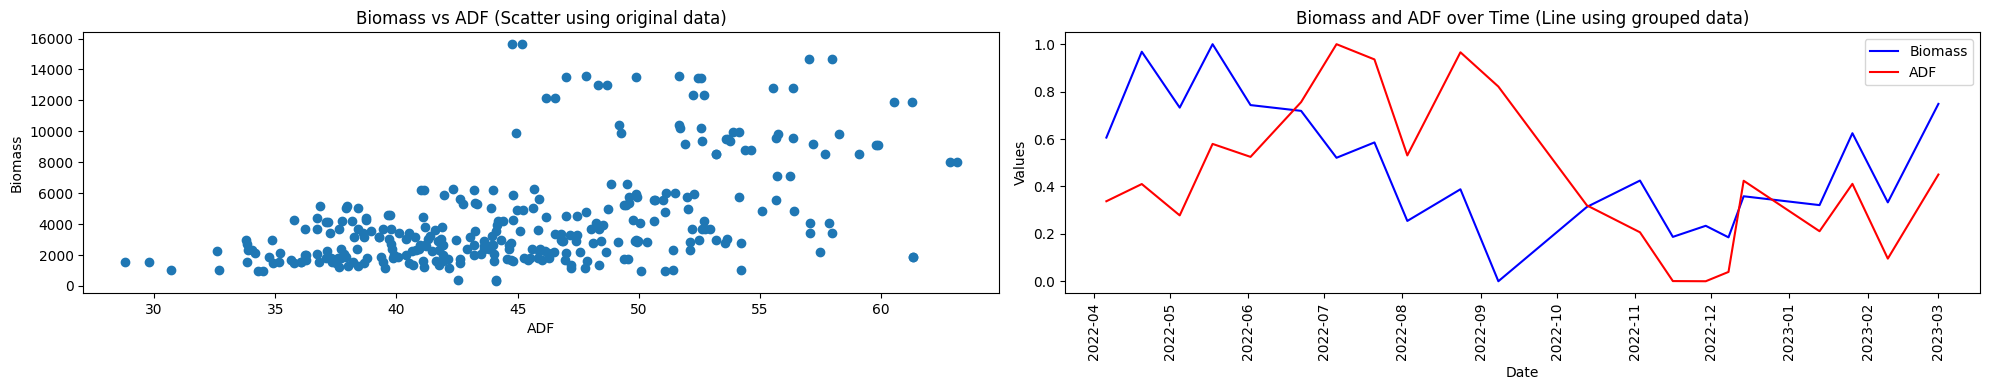

Vegetation Indices:


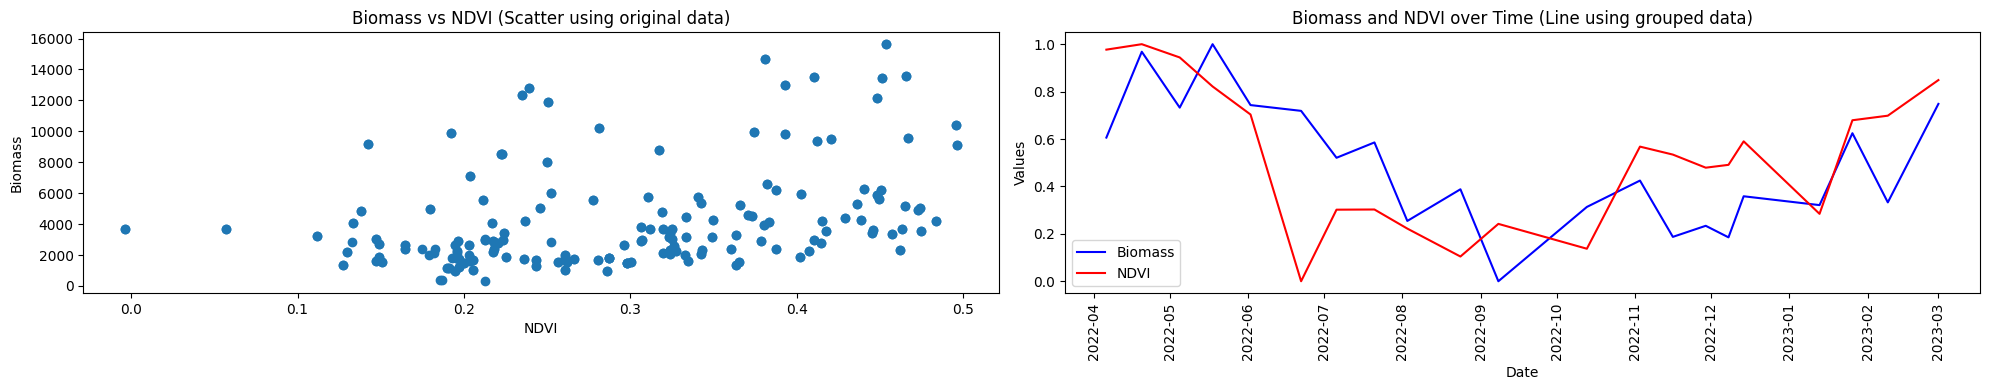

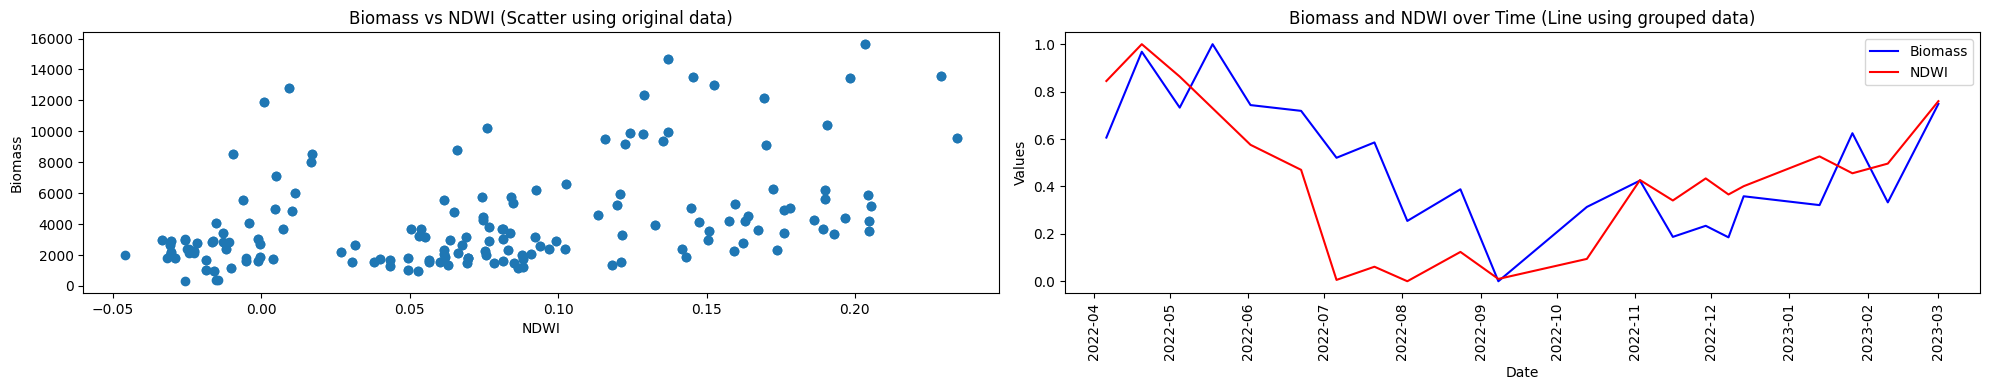

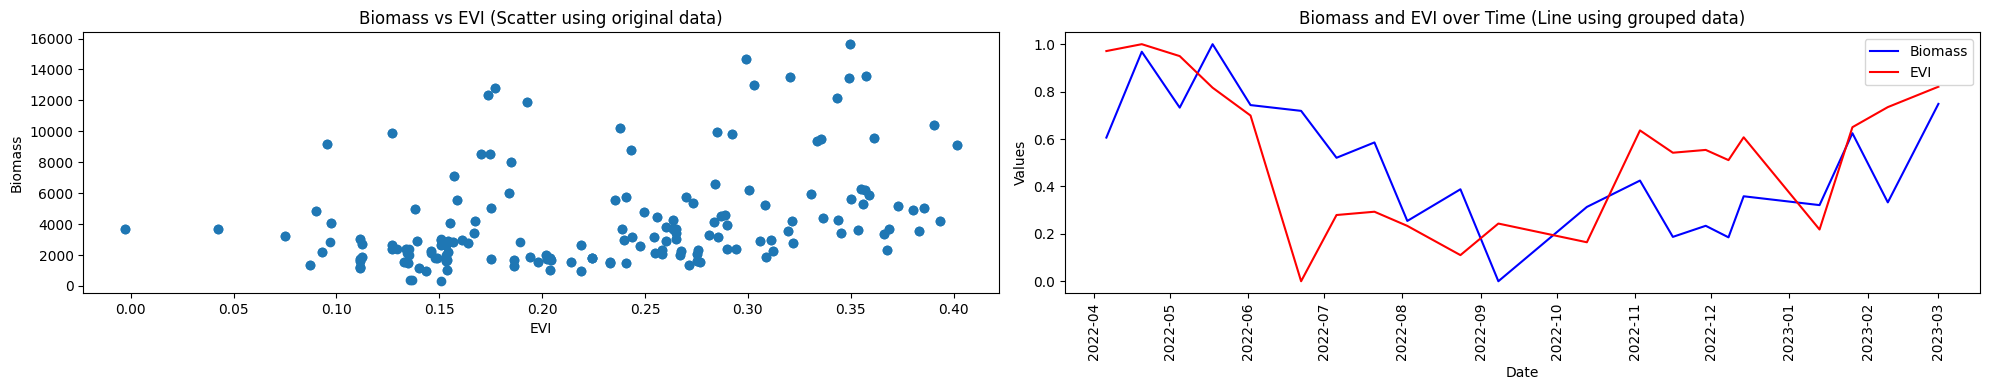

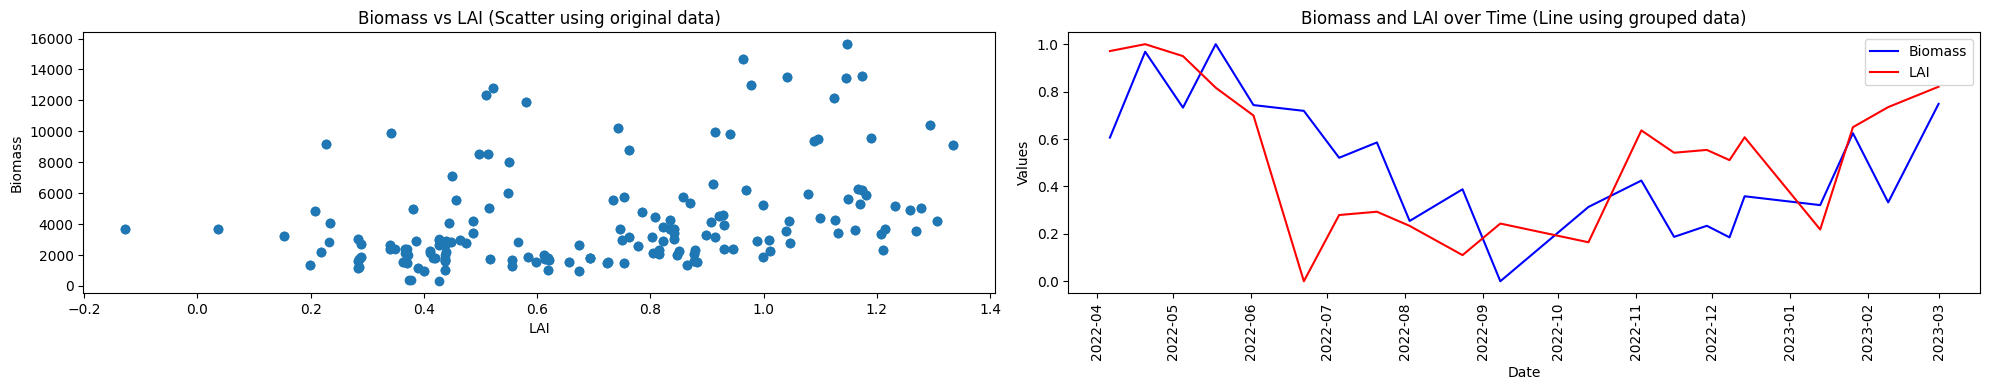

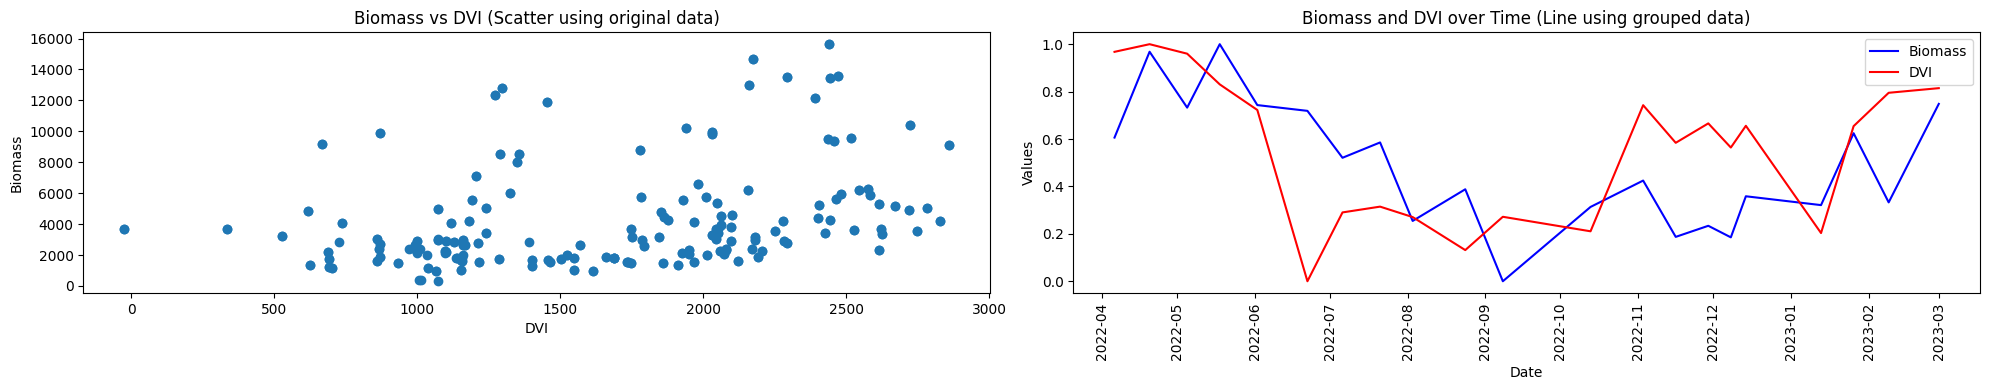

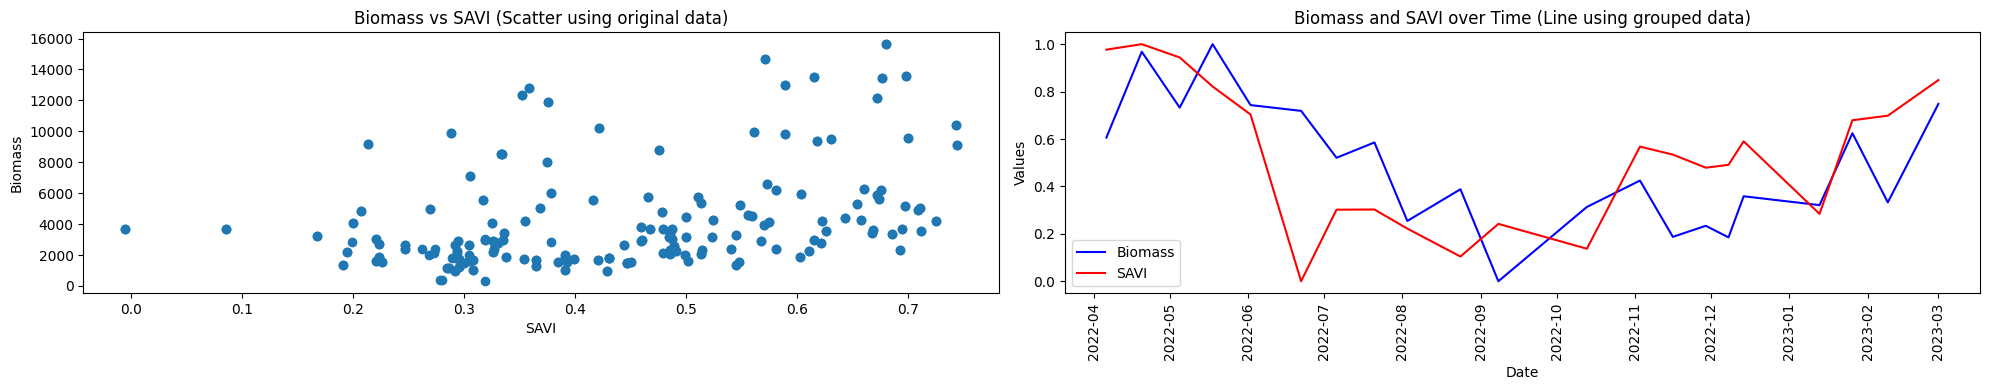

Weather Parameters:


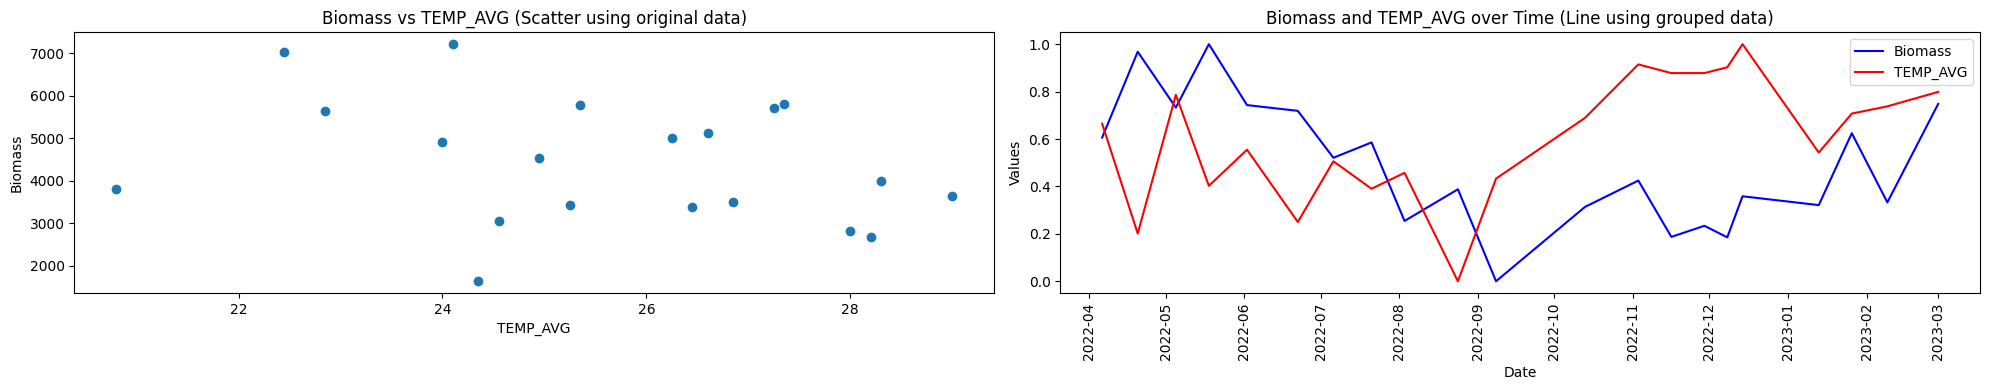

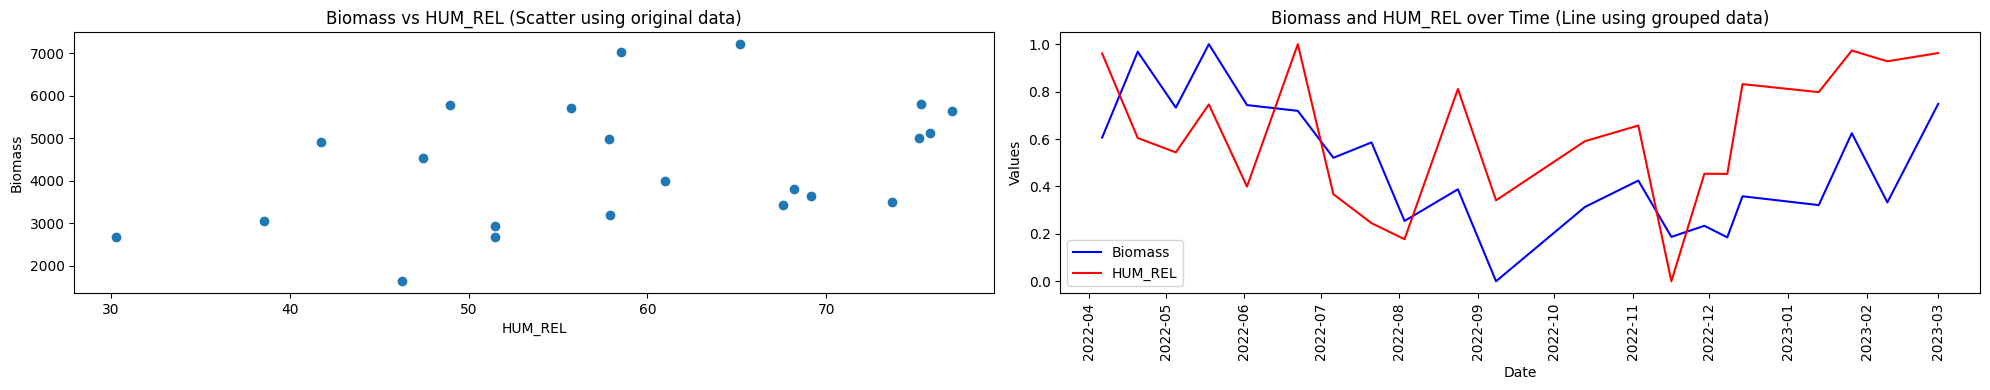

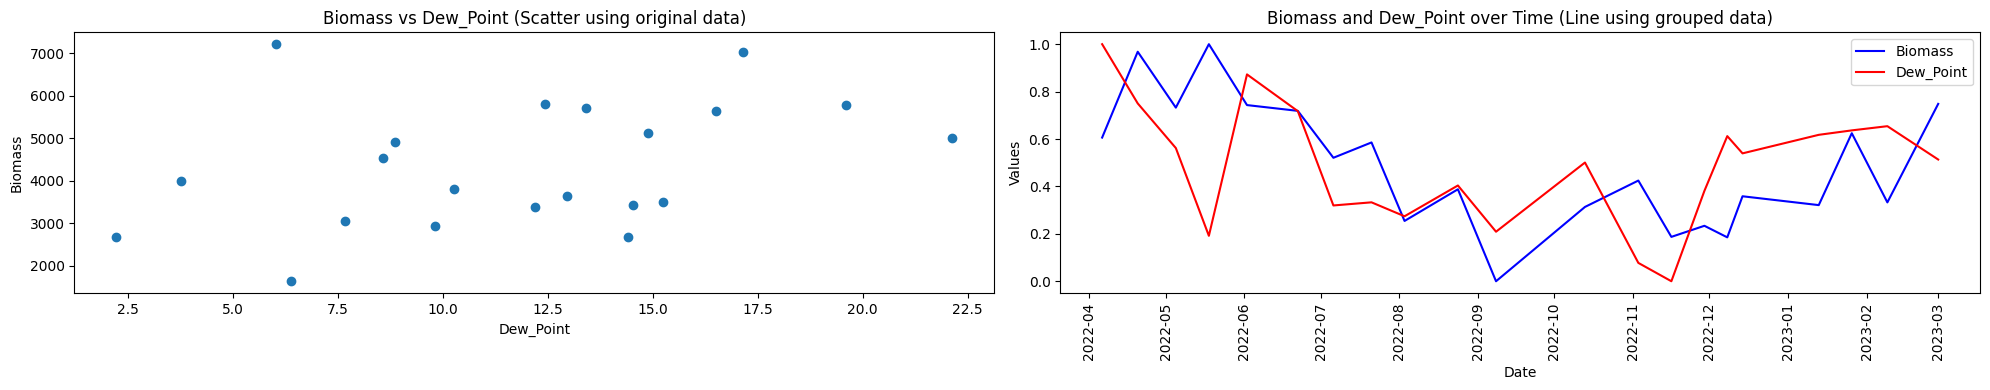

'\nplot_features(cleaned_data, [\'NDF\',\'ADF\',\'TDN_based_NDF\',\'TDN_based_ADF\',\'NDVI\',\'NDWI\',\'EVI\',\'LAI\',\'DVI\',\'GCI\',\'SAVI\',\'B6\',\'B7\',\'B8\',\'B8A\',\'B9\',\'CP\'], "Chosen Parameters:")\nplot_features(cleaned_data,[\'TEMP_AVG\',\'RAD_SOL\',\'HUM_REL\',\'EVAPOT\'], "Chosen Parameters:", points=True)\n'

In [17]:
def plot_features(cleaned_data, feature_columns, title, points=False):
    print(title)
    df_cleaned= cleaned_data.groupby('Date').agg('mean').reset_index()
    scaler = MinMaxScaler()
    df_cleaned[nutritional_df.columns] = scaler.fit_transform(df_cleaned[nutritional_df.columns])
    df_cleaned[vegetation_indices_df.columns] = scaler.fit_transform(df_cleaned[vegetation_indices_df.columns])
    df_cleaned[weather_parameters_df.columns] = scaler.fit_transform(df_cleaned[weather_parameters_df.columns])
    for feature in feature_columns:
        plt.figure(figsize=(20, 4))
        plt.subplot(1, 2, 1)
        if(points):
            group = weather_parameters_df.loc[:,[feature]]
            group['Biomass'] = cleaned_data['Biomass']
            group = group.groupby(feature)["Biomass"].mean().reset_index()
            plt.scatter(group[feature], group["Biomass"])
        else:
            plt.scatter(cleaned_data[feature], cleaned_data["Biomass"])
        plt.title(f"Biomass vs {feature} (Scatter using original data)")
        plt.xlabel(feature)
        plt.ylabel("Biomass")
        
        plt.subplot(1, 2, 2)
        plt.plot(df_cleaned["Date"], df_cleaned["Biomass"], label="Biomass", color='b')
        plt.plot(df_cleaned["Date"], df_cleaned[feature], label=feature, color='r')
        plt.title(f"Biomass and {feature} over Time (Line using grouped data)")
        plt.xlabel("Date")
        plt.ylabel("Values")
        plt.legend()
        plt.xticks(rotation=90)
        
        plt.tight_layout()
        plt.show()

plot_features(cleaned_data, ['ADF'], "Nutritional Parameters:")

plot_features(cleaned_data,['NDVI', 'NDWI', 'EVI', 'LAI','DVI', 'SAVI'], "Vegetation Indices:")

plot_features(cleaned_data, ['TEMP_AVG','HUM_REL', 'Dew_Point'], "Weather Parameters:",points=True)
'''
plot_features(cleaned_data, ['NDF','ADF','TDN_based_NDF','TDN_based_ADF','NDVI','NDWI','EVI','LAI','DVI','GCI','SAVI','B6','B7','B8','B8A','B9','CP'], "Chosen Parameters:")
plot_features(cleaned_data,['TEMP_AVG','RAD_SOL','HUM_REL','EVAPOT'], "Chosen Parameters:", points=True)
'''


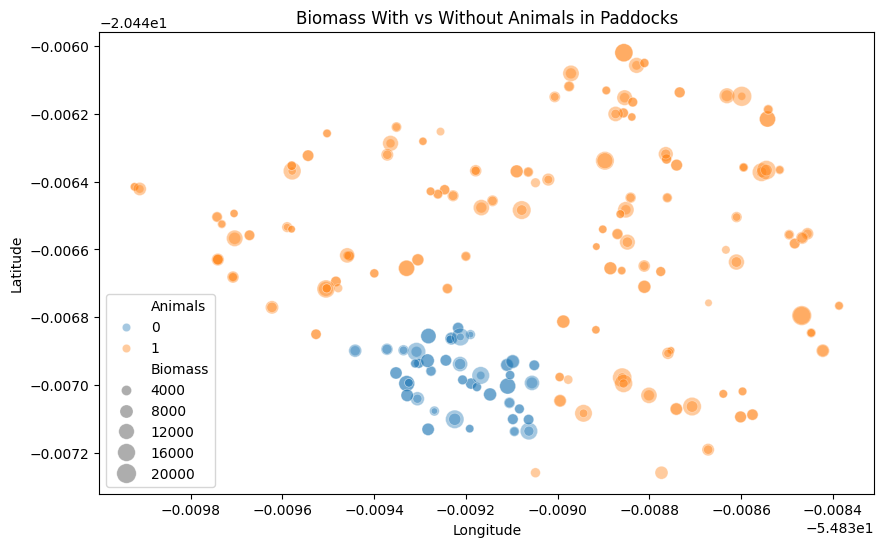

                mean       median           var
Animals                                        
0        8495.500000  8677.166667  1.157693e+07
1        2757.571053  2562.000000  1.603249e+06


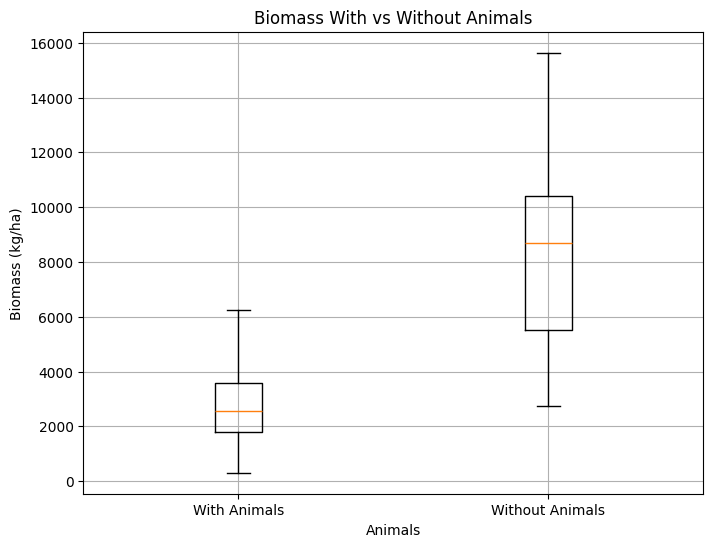

In [18]:
plt.figure(figsize=(10, 6)) 
sns.scatterplot(
    x=df["Long_"],
    y=df["Lat"],
    size=cleaned_data["Biomass"]*1.3,
    hue=df["Animals"],
    sizes=(20, 200),
    alpha=0.4,
)
plt.title('Biomass With vs Without Animals in Paddocks')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(loc='lower left')
plt.show()

# Grouped biomass by animals
grouped_animals = cleaned_data.groupby("Animals")["Biomass"].agg(["mean", "median", "var"])
print(grouped_animals)

with_animals = cleaned_data.loc[cleaned_data["Animals"] == 1,"Biomass"]
without_animals = cleaned_data.loc[cleaned_data["Animals"] == 0,"Biomass"]
# Box plot for Biomass: With vs. Without Animals
plt.figure(figsize=(8, 6))  # Adjust the figure size for better clarity
plt.boxplot(x=[with_animals,without_animals])
plt.xticks([1,2],["With Animals","Without Animals"])
plt.title('Biomass With vs Without Animals')
plt.xlabel('Animals')
plt.ylabel('Biomass (kg/ha)')
plt.grid(True)
plt.show()


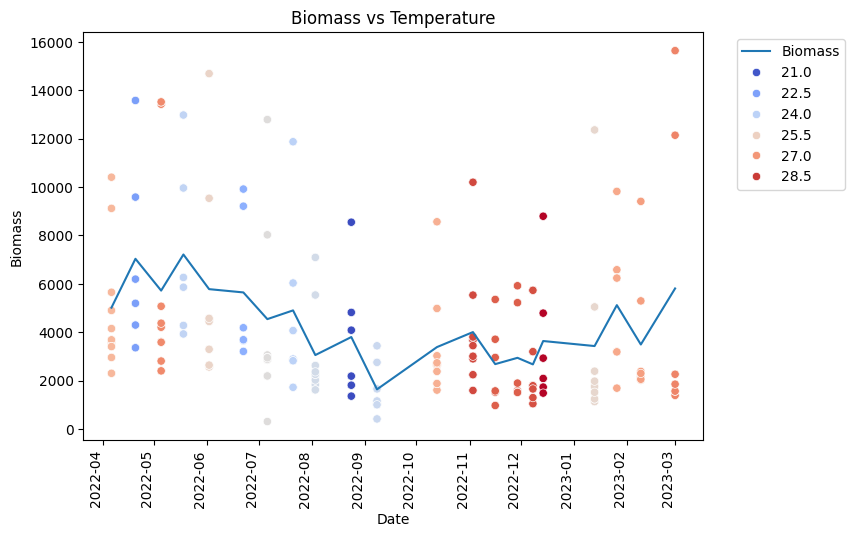

In [19]:
plt.figure(figsize=(8, 6))  # Adjust the figure size for better clarity
grouped = cleaned_data.groupby('Date')['Biomass'].mean().sort_index()
grouped.plot(kind='line', title='Average Biomass Over Time')
Temp_Bio = cleaned_data[['Date','Biomass','TEMP_AVG']]
sns.scatterplot(x='Date',y='Biomass',hue='TEMP_AVG',data=Temp_Bio,palette='coolwarm')
plt.title('Biomass vs Temperature')
plt.xlabel('Date')
plt.ylabel('Biomass')
plt.xticks(rotation=90)
plt.legend(loc="upper right", bbox_to_anchor=(1.24, 1)) 
plt.show()


In [20]:
Categorical = cleaned_data[['Biomass','Animals']]
Q1 = Categorical['Biomass'].quantile(0.25)
Q2 = Categorical['Biomass'].median()
Q3 = Categorical['Biomass'].quantile(0.75)
IQR = Q3 - Q1
print("Biomass Position:")
print("Q1:",Q1,"Q2:",Q2,"Q3:",Q3)
print("Biomass Dispersion:")
print("IQR:",IQR)

Categorical['Biomass_Amount'] = Categorical["Biomass"].apply(lambda x: 'High' if x>= Q3 else 'Medium' if x>=Q1 else 'Low')
print(Categorical)

Contingency_table= pd.crosstab(Categorical['Animals'],Categorical['Biomass_Amount'])
Contingency_table

Biomass Position:
Q1: 2026.333333 Q2: 3189.8333334999998 Q3: 5237.25
Biomass Dispersion:
IQR: 3210.916667
          Biomass  Animals Biomass_Amount
0     2955.000000        1         Medium
1     9116.333333        0           High
2     9116.333333        0           High
3    10404.666670        0           High
4     4148.666667        1         Medium
..            ...      ...            ...
307   1851.000000        1            Low
308  12139.333330        0           High
309  15634.666670        0           High
310  15634.666670        0           High
311  12139.333330        0           High

[312 rows x 3 columns]


C:\Users\User\AppData\Local\Temp\ipykernel_24360\1183065084.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Categorical['Biomass_Amount'] = Categorical["Biomass"].apply(lambda x: 'High' if x>= Q3 else 'Medium' if x>=Q1 else 'Low')


Biomass_Amount  High  Low  Medium
Animals                          
0                 68    0      16
1                 10   77     141

In [21]:
print("With Animals")
with_animals_freq = Categorical.loc[Categorical['Animals'] == 1,'Biomass_Amount'].value_counts()
print(with_animals_freq)
print("Without Animals")
without_animals_freq = Categorical.loc[Categorical['Animals'] == 0,'Biomass_Amount'].value_counts()
print(without_animals_freq)

With Animals
Biomass_Amount
Medium    141
Low        77
High       10
Name: count, dtype: int64
Without Animals
Biomass_Amount
High      68
Medium    16
Name: count, dtype: int64


Relative frequency for biomass with animals
Biomass_Amount
Medium    61.842105
Low       33.771930
High       4.385965
Name: count, dtype: float64
Relative frequency for biomass without animals
Biomass_Amount
High      80.952381
Medium    19.047619
Name: count, dtype: float64


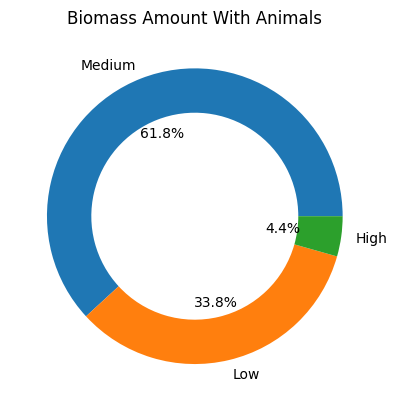

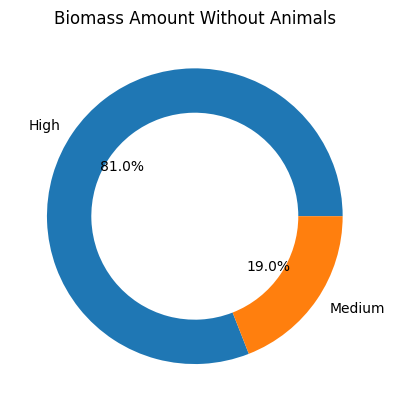

In [22]:
With_animals_relative_freq = with_animals_freq/with_animals_freq.sum() * 100
Without_animals_relative_freq = without_animals_freq/without_animals_freq.sum() * 100
print("Relative frequency for biomass with animals")
print(With_animals_relative_freq)
print("Relative frequency for biomass without animals")
print(Without_animals_relative_freq)
plt.pie(with_animals_freq,labels=with_animals_freq.index,autopct='%1.1f%%',wedgeprops={'width': 0.3})
plt.title('Biomass Amount With Animals')
plt.show()
plt.pie(without_animals_freq,labels=without_animals_freq.index,autopct='%1.1f%%',wedgeprops={'width': 0.3})
plt.title('Biomass Amount Without Animals')
plt.show()

In [23]:
CV = Categorical['Biomass'].std()/Categorical['Biomass'].mean()
print(CV)


0.7623629118069463


In [24]:
data = cleaned_data.loc[:,cleaned_data.columns!='Date']
data.head()

DM        MM       Biomass        NDF        ADF        CP  \
0  19.619887  8.906884   2955.000000  71.362299  44.300453  9.670905   
1  29.635522  7.282413   9116.333333  86.819928  59.881452  3.882340   
2  35.981508  7.474926   9116.333333  87.036673  59.774985  3.785282   
3  28.820830  6.796597  10404.666670  77.560976  49.177231  4.788581   
4  20.290211  5.667645   4148.666667  67.636851  37.074699  7.785068   

   TDN_based_ADF  TDN_based_NDF    B1    B2  ...  TP_SFC_AVG    Wind_Dir  \
0      54.389947      54.024785  1309  1400  ...    27.98893  154.666977   
1      42.252349      47.577408  1371  1391  ...    27.98893  154.666977   
2      42.335287      47.487004  1371  1391  ...    27.98893  154.666977   
3      50.590937      51.439317  1365  1314  ...    27.98893  154.666977   
4      60.018809      55.578670  1326  1407  ...    27.98893  154.666977   

   Dew_Point  Radiative_Dif_AVG  Radiative_Direct_AVG        PPFD  \
0  22.131944          55.432106            306.550637  532.417331   
1  22.131944          55.432106            306.550637  532.417331   
2  22.131944          55.432106            306.550637  532.417331   
3  22.131944          55.432106            306.550637  532.417331   
4  22.131944          55.432106            306.550637  532.417331   

   Longwave_Rad_AVG  Environmental Suitability Index  Animals  TEMP_AVG  
0        411.760365                         4.527566        1     26.25  
1        411.760365                         4.072976        0     26.25  
2        411.760365                         5.472976        0     26.25  
3        411.760365                         4.072684        0     26.25  
4        411.760365                         5.613194        1     26.25  

[5 rows x 46 columns]

In [156]:
x = data.drop(['Biomass'],axis = 1)
y = data['Biomass']

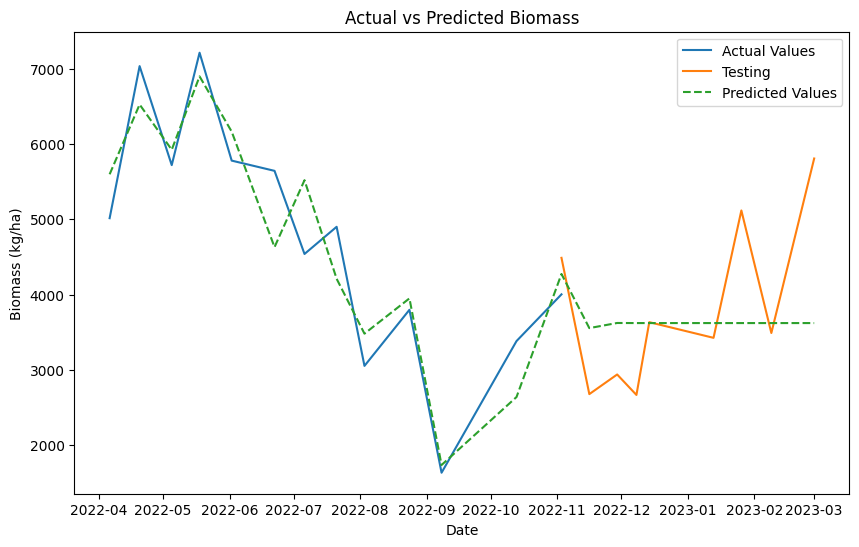

R2: 0.861


In [154]:
forecast = []
size = 5
training_size = 200
biomasses = list(y.iloc[0:training_size])
count = 1
forecast.extend(biomasses[:size])
for i in range(size,len(y)):
    if i <= len(biomasses):
        mean = sum(biomasses[i - size:i])/len(biomasses[i - size:i])
        forecast.append(mean)
    elif i > len(biomasses) + size:
        mean = sum(forecast[-size:])/len(forecast[-size:])
        forecast.append(mean)
    else:
        new = biomasses[-size+count:] + forecast[-count:]
        mean = sum(new)/len(new)
        count = count + 1
        forecast.append(mean)
actual = pd.concat([cleaned_data['Date'][:training_size+2],y[:training_size+2]],axis = 1).groupby('Date')['Biomass'].mean()
testing = pd.concat([cleaned_data['Date'][training_size:],y[training_size:]],axis = 1).groupby('Date')['Biomass'].mean()
predicted = pd.concat([cleaned_data['Date'],pd.Series(forecast)],names=['Date','Biomass'],axis= 1)
predicted.columns = ['Date','Biomass']
predicted = predicted.groupby('Date')['Biomass'].mean()

plt.figure(figsize=(10, 6))
plt.plot(actual, label="Actual Values")
plt.plot(testing,label="Testing")
plt.plot(predicted, label="Predicted Values", linestyle="--")
plt.legend()
plt.title("Actual vs Predicted Biomass")
plt.xlabel("Date")
plt.ylabel("Biomass (kg/ha)")
plt.show()
r2=r2_score(actual,predicted.iloc[:len(actual)])
print("R2:", round(r2, 3))

In [113]:
def apply_DecisionTreeRegressor(x_train, x_test, y_train , y_test):
    model =DecisionTreeRegressor()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    r2 = r2_score(y_test, y_pred)
    return r2,y_pred

def SelectFromModel_Selecting(model):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,train_size=0.8)
    selector = SelectFromModel(model)
    selector.fit(x_train, y_train)
    selected_features = list(x_train.columns[selector.get_support()])    
    x_train_selected = x_train[selected_features]
    x_test_selected = x_test[selected_features]
    return x_train_selected, x_test_selected,y_train,y_test

def Sequential_Selecting(model,direction):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,train_size=0.8)
    selector = SequentialFeatureSelector(model, n_features_to_select=5, direction=direction)
    selector.fit(x_train, y_train)
    selected_features = list(x_train.columns[selector.get_support()])    
    print("Selected Features:")
    print(selected_features)
    x_train_selected = x_train[selected_features]
    x_test_selected = x_test[selected_features]
    return x_train_selected, x_test_selected, y_train, y_test


In [114]:
r2_scores_seq_line = []
r2_scores_seq_tree = []
r2_scores_seq_SVR = []
r2_scores_seq_k = []
for i in range(10):
    r2_scores_seq_tree.append(apply_DecisionTreeRegressor(*Sequential_Selecting(DecisionTreeRegressor(),'backward'))[0])
    r2_scores_seq_line.append(apply_DecisionTreeRegressor(*Sequential_Selecting(LinearRegression(),'backward'))[0])
    r2_scores_seq_SVR.append(apply_DecisionTreeRegressor(*Sequential_Selecting(SVR(),'backward'))[0])
    r2_scores_seq_k.append(apply_DecisionTreeRegressor(*Sequential_Selecting(KNeighborsRegressor(n_neighbors=5),'backward'))[0])


Selected Features:
['DM', 'NDWI', 'EVAPOT', 'HUM_REL', 'Animals']
Selected Features:
['EVI', 'DVI', 'SAVI', 'Longwave_Rad_AVG', 'Animals']
Selected Features:
['NDVI', 'NDWI', 'EVI', 'SAVI', 'Animals']
Selected Features:
['B6', 'B8', 'B8A', 'B9', 'B12']
Selected Features:
['B3', 'B12', 'NDVI', 'RAD_SOL', 'Animals']
Selected Features:
['EVI', 'LAI', 'Dew_Point', 'Longwave_Rad_AVG', 'Animals']
Selected Features:
['NDVI', 'NDWI', 'EVI', 'SAVI', 'Animals']
Selected Features:
['B2', 'B3', 'B4', 'B9', 'DVI']
Selected Features:
['DM', 'B1', 'B12', 'HUM_REL', 'Animals']
Selected Features:
['EVI', 'DVI', 'TEMP_MAX', 'Longwave_Rad_AVG', 'Animals']
Selected Features:
['NDVI', 'NDWI', 'EVI', 'SAVI', 'Animals']
Selected Features:
['B3', 'B6', 'B8A', 'B9', 'B12']
Selected Features:
['DM', 'B1', 'B5', 'SAVI', 'Animals']
Selected Features:
['DM', 'EVI', 'RAD_SOL', 'TP_SFC_AVG', 'Animals']
Selected Features:
['NDVI', 'NDWI', 'EVI', 'SAVI', 'Animals']
Selected Features:
['B3', 'B6', 'B8A', 'B9', 'DVI']
S

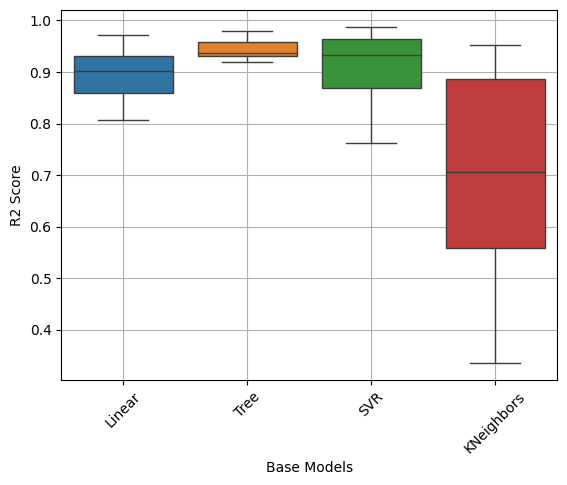

In [115]:
sns.boxplot([r2_scores_seq_line, r2_scores_seq_tree,r2_scores_seq_SVR,r2_scores_seq_k])
plt.xticks(ticks=[0, 1, 2, 3], labels=['Linear','Tree','SVR','KNeighbors'],rotation = 45)
plt.xlabel('Base Models')
plt.grid(True)
plt.ylabel('R2 Score')
plt.show()

In [116]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
}
feature_selection_models = ["SelectFromModel","SequentialFeatureSelector"]

results = []

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,train_size=0.8,random_state=12)
for feature_selection_model in feature_selection_models:
    for base_name, base_model in models.items():
        if(feature_selection_model == "SelectFromModel"):
            selector = SelectFromModel(base_model)
            selector.fit(x_train, y_train)
            selected_features = list(x_train.columns[selector.get_support()])    
            x_train_selected = x_train[selected_features]
            x_test_selected = x_test[selected_features]

        elif (feature_selection_model  == "SequentialFeatureSelector"):
            selector = SequentialFeatureSelector(base_model, n_features_to_select=5, direction='backward')
            selector.fit(x_train, y_train)
            selected_features = list(x_train.columns[selector.get_support()])    
            x_train_selected = x_train[selected_features]
            x_test_selected = x_test[selected_features]

        for predictive_name, predictive_model in models.items():
            predictive_model.fit(x_train_selected, y_train)
            y_pred = predictive_model.predict(x_test_selected)
            mae = mean_absolute_error(y_test, y_pred)
            r2 = r2_score(y_test, y_pred)
            results.append({
                    'Feature Selection Model': feature_selection_model,
                    'Base Model': base_name,
                    'Predictive Model': predictive_name,
                    'R2 Score': r2,
                    'MAE': mae
                })
results = pd.DataFrame(results)


In [117]:
grouped = results.groupby(['Feature Selection Model','Base Model','Predictive Model'])[['R2 Score','MAE']].mean()

In [118]:
grouped

R2 Score  \
Feature Selection Model   Base Model        Predictive Model              
SelectFromModel           Decision Tree     Decision Tree      0.979603   
                                            Linear Regression  0.733596   
                          Linear Regression Decision Tree      0.619763   
                                            Linear Regression  0.585958   
SequentialFeatureSelector Decision Tree     Decision Tree      0.739421   
                                            Linear Regression  0.725331   
                          Linear Regression Decision Tree      0.976283   
                                            Linear Regression  0.725394   

                                                                       MAE  
Feature Selection Model   Base Model        Predictive Model                
SelectFromModel           Decision Tree     Decision Tree       184.303704  
                                            Linear Regression  1276.219524  
                          Linear Regression Decision Tree      1100.137037  
                                            Linear Regression  1500.072129  
SequentialFeatureSelector Decision Tree     Decision Tree       662.666138  
                                            Linear Regression  1295.342310  
                          Linear Regression Decision Tree       209.674074  
                                            Linear Regression  1326.907487

Text(0.5, 0, 'MAE')

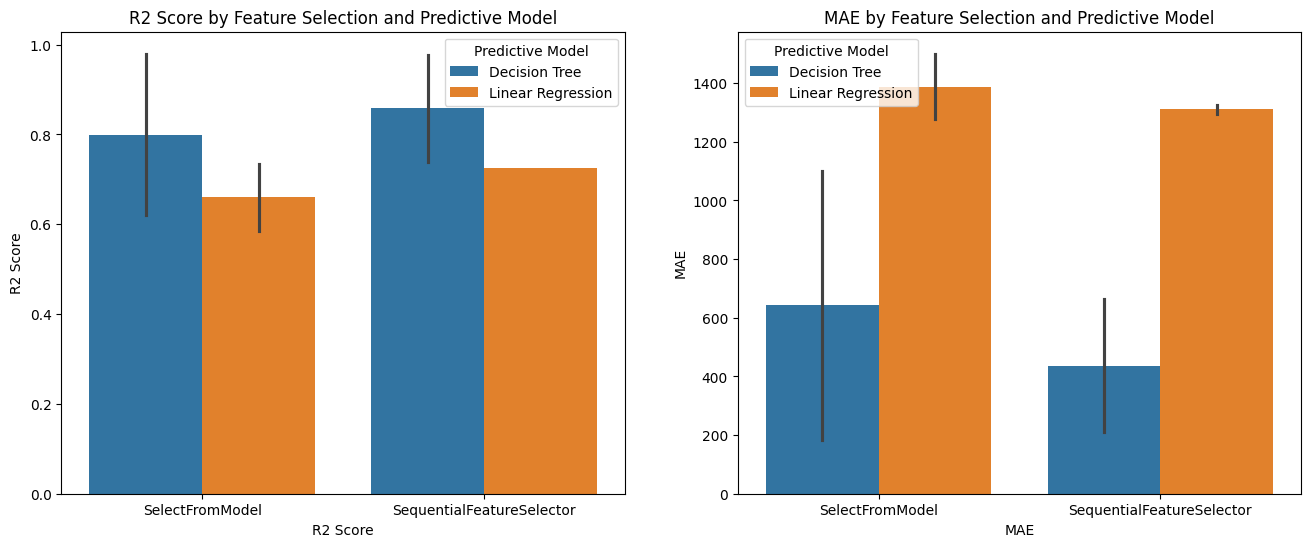

In [155]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
axes =axes.flatten()

sns.barplot(x="Feature Selection Model", y="R2 Score", hue="Predictive Model", data=grouped, ax=axes[0])
axes[0].set_title("R2 Score by Feature Selection and Predictive Model")
axes[0].set_xlabel("R2 Score")

sns.barplot(x="Feature Selection Model", y="MAE", hue="Predictive Model", data=grouped, ax=axes[1])
axes[1].set_title("MAE by Feature Selection and Predictive Model")
axes[1].set_xlabel("MAE")



In [157]:
x_train_selected,x_test_selected,y_train,y_test = Sequential_Selecting(LinearRegression(),direction = "backward")
r2_Prediction_models,y_pred = apply_DecisionTreeRegressor(x_train_selected,x_test_selected,y_train,y_test)
chosen_features = x_train_selected.columns

Selected Features:
['EVI', 'GEMI', 'Dew_Point', 'Longwave_Rad_AVG', 'Animals']


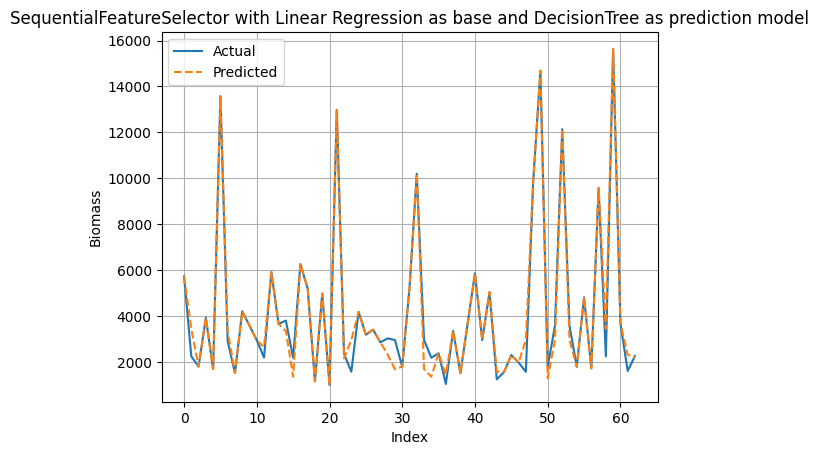

R2: 0.9809862329021258


In [164]:
plt.plot(y_test.values, label = 'Actual')
plt.plot(y_pred,linestyle = '--',label = 'Predicted')
plt.grid(True)
plt.title("SequentialFeatureSelector with Linear Regression as base and DecisionTree as prediction model")
plt.legend()
plt.xlabel("Index")
plt.ylabel("Biomass")
plt.show()
print(f'R2: {r2_Prediction_models}')


In [122]:
cleaned_data.columns


Index(['DM', 'MM', 'Biomass', 'NDF', 'ADF', 'CP', 'TDN_based_ADF',
       'TDN_based_NDF', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A',
       'B9', 'B11', 'B12', 'NDVI', 'NDWI', 'EVI', 'LAI', 'DVI', 'GCI', 'GEMI',
       'SAVI', 'TEMP_MAX', 'TEMP_MIN', 'RAD_SOL', 'Rainfall', 'WIND_SPD',
       'EVAPOT', 'PRES_ATM', 'HUM_REL', 'TP_SFC_AVG', 'Wind_Dir', 'Dew_Point',
       'Radiative_Dif_AVG', 'Radiative_Direct_AVG', 'PPFD', 'Longwave_Rad_AVG',
       'Environmental Suitability Index', 'Date', 'Animals', 'TEMP_AVG'],
      dtype='object')

In [123]:
chosen_features

Index(['B6', 'B12', 'GCI', 'EVAPOT', 'Animals'], dtype='object')

In [124]:
selected_data = cleaned_data[list(chosen_features)+['Biomass']]
scaler = MinMaxScaler()
selected_data[selected_data.columns] = scaler.fit_transform(selected_data)

C:\Users\User\AppData\Local\Temp\ipykernel_24360\793202404.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data[selected_data.columns] = scaler.fit_transform(selected_data)


In [125]:
x = selected_data[list(chosen_features)]
y = selected_data['Biomass']

In [126]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,train_size=0.8,random_state=12)

In [127]:
x_train = np.expand_dims(x_train.values, axis=1)
x_test = np.expand_dims(x_test.values, axis=1)
x_train.shape

(249, 1, 5)

In [128]:
model = Sequential([LSTM(units=64, input_shape=(x_train.shape[1], x_train.shape[2])),
                              Dense(1)])


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [129]:
model.compile(optimizer='adam',loss = 'mse')

In [130]:
history = model.fit(x_train,y_train,epochs=100,batch_size=16,validation_data = (x_test,y_test),verbose = 1)

Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.1629 - val_loss: 0.0911
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0581 - val_loss: 0.0595
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0590 - val_loss: 0.0510
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0482 - val_loss: 0.0443
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0357 - val_loss: 0.0386
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0371 - val_loss: 0.0325
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0301 - val_loss: 0.0276
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0287 - val_loss: 0.0236
Epoch 9/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0238 - val_loss: 0.0206
Epoch 10/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0208 - val_loss: 0.0185
Epoch 11/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0223 - val_loss: 0.0170
Epoch 12/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0

In [131]:
loss = model.evaluate(x_test, y_test)
print(loss)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0144
0.012661554850637913


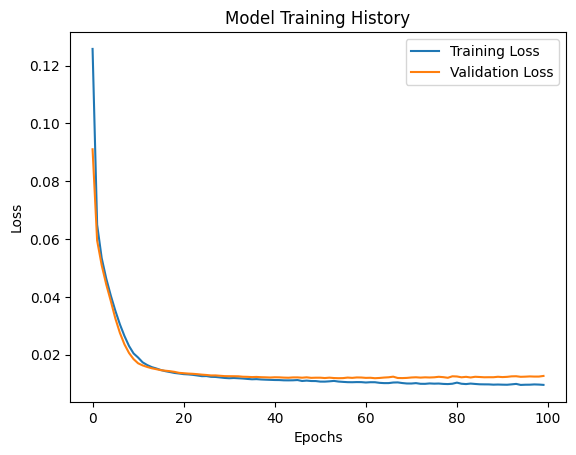

In [132]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Training History')
plt.show()

In [133]:
predictions = model.predict(x_test)

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/stepWARNING:tensorflow:6 out of the last 6 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x00000222AA2632E0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


In [134]:
len(predictions)

63

In [135]:
y_visual = y_test.reset_index(drop=True)

In [136]:
y_visual

0     0.204700
1     0.366073
2     0.070573
3     0.294248
4     0.078554
        ...   
58    0.255149
59    0.153967
60    0.537428
61    0.553564
62    0.094689
Name: Biomass, Length: 63, dtype: float64

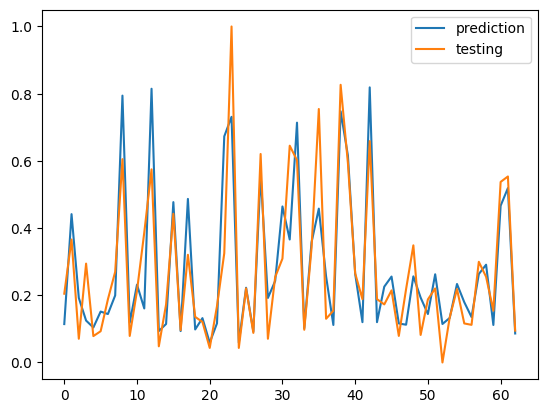

In [137]:
plt.plot(predictions,label = 'prediction')
plt.plot(y_visual,label = 'testing')
plt.legend()
plt.show()

In [138]:
LSTM_r2_score = r2_score(y_visual,predictions)
print(f"R2 Score for LSTM is: {LSTM_r2_score}")

R2 Score for LSTM is: 0.7314668838736491


In [139]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
iterations_mse = pd.read_csv(r"EvoloPy-master\2025-01-24-04-32-09\experiment_details.csv") # This is a result of the optimization process using the EvoloPy library, which contains details about the experiment, including the mean squared error (MSE) for each iteration, you should updated the path to your result file after using EvoloPy to optimize the model
actual_data = pd.read_csv(r"Complete_Dataset_updated.csv")
actual_ESI = actual_data['Environmental Suitability Index']

In [219]:
iterations_mse.head()

Optimizer objfname  ExecutionTime                          Individual  \
0        GA  MSE_ESI       0.662372  [0.32152805 0.12752839 0.75453078]   
1        GA  MSE_ESI       0.618918  [0.31786333 0.12996675 0.50281137]   
2        GA  MSE_ESI       0.637381  [0.31599429 0.13283479 0.2127273 ]   
3        GA  MSE_ESI       0.639203  [0.3159127  0.12818044 0.68431585]   
4        GA  MSE_ESI       0.623170  [0.31339963 0.13251439 0.29425349]   

      Iter1     Iter2     Iter3     Iter4     Iter5     Iter6  ...    Iter71  \
0  0.592058  0.592058  0.592058  0.592058  0.592058  0.559032  ...  0.347639   
1  2.462930  1.121498  0.856227  0.856227  0.634614  0.345938  ...  0.345098   
2  2.845303  2.342560  0.688964  0.624823  0.624823  0.624823  ...  0.343891   
3  1.367720  0.936026  0.936026  0.936026  0.936026  0.936026  ...  0.346906   
4  1.779973  1.590484  1.590484  1.590484  1.590484  1.088327  ...  0.343903   

     Iter72    Iter73    Iter74    Iter75    Iter76    Iter77    Iter78  \
0  0.347639  0.347639  0.347639  0.347639  0.347639  0.347639  0.347639   
1  0.345098  0.345098  0.345098  0.345098  0.345098  0.345098  0.345098   
2  0.343891  0.343891  0.343891  0.343891  0.343891  0.343891  0.343891   
3  0.346906  0.346906  0.346906  0.346906  0.346906  0.346846  0.346846   
4  0.343903  0.343903  0.343903  0.343903  0.343903  0.343903  0.343903   

     Iter79    Iter80  
0  0.347639  0.347639  
1  0.345098  0.345098  
2  0.343891  0.343891  
3  0.346846  0.346832  
4  0.343903  0.343903  

[5 rows x 84 columns]

In [220]:
first,second,third =("GA","MVO","DE")
GA_records = iterations_mse[iterations_mse['Optimizer'] == first]
MVO_records = iterations_mse[iterations_mse['Optimizer'] == second]
DE_records = iterations_mse[iterations_mse['Optimizer'] == third]

In [221]:
best_GA_weights = GA_records.loc[GA_records.iloc[:,-1] ==GA_records.iloc[:,-1].min()]
best_MVO_weights = MVO_records.loc[MVO_records.iloc[:,-1] == MVO_records.iloc[:,-1].min()]
best_DE_weights = DE_records.loc[DE_records.iloc[:,-1] == DE_records.iloc[:,-1].min()]
best_weights = iterations_mse.loc[iterations_mse.iloc[:,-1] == iterations_mse.iloc[:,-1].min()]

In [222]:
best_GA_weights

Optimizer objfname  ExecutionTime                          Individual  \
2        GA  MSE_ESI       0.637381  [0.31599429 0.13283479 0.2127273 ]   

      Iter1    Iter2     Iter3     Iter4     Iter5     Iter6  ...    Iter71  \
2  2.845303  2.34256  0.688964  0.624823  0.624823  0.624823  ...  0.343891   

     Iter72    Iter73    Iter74    Iter75    Iter76    Iter77    Iter78  \
2  0.343891  0.343891  0.343891  0.343891  0.343891  0.343891  0.343891   

     Iter79    Iter80  
2  0.343891  0.343891  

[1 rows x 84 columns]

In [223]:
best_MVO_weights

Optimizer objfname  ExecutionTime                          Individual  \
23       MVO  MSE_ESI       0.789355  [0.31485688 0.13416248 0.12838835]   

       Iter1     Iter2     Iter3     Iter4     Iter5     Iter6  ...    Iter71  \
23  0.924948  0.432318  0.432318  0.385994  0.385994  0.385994  ...  0.343763   

      Iter72    Iter73    Iter74    Iter75    Iter76    Iter77    Iter78  \
23  0.343684  0.343681  0.343681  0.343681  0.343681  0.343681  0.343681   

      Iter79    Iter80  
23  0.343681  0.343681  

[1 rows x 84 columns]

In [224]:
best_DE_weights

Optimizer objfname  ExecutionTime                          Individual  \
42        DE  MSE_ESI        0.84697  [0.31473845 0.13380777 0.16186981]   

       Iter1     Iter2     Iter3     Iter4     Iter5     Iter6  ...    Iter71  \
42  1.038696  1.038696  1.038696  1.038696  0.530412  0.451152  ...  0.343667   

      Iter72    Iter73    Iter74    Iter75    Iter76    Iter77    Iter78  \
42  0.343667  0.343667  0.343667  0.343667  0.343667  0.343667  0.343667   

      Iter79    Iter80  
42  0.343667  0.343667  

[1 rows x 84 columns]

In [225]:
best_weights

Optimizer objfname  ExecutionTime                          Individual  \
42        DE  MSE_ESI        0.84697  [0.31473845 0.13380777 0.16186981]   

       Iter1     Iter2     Iter3     Iter4     Iter5     Iter6  ...    Iter71  \
42  1.038696  1.038696  1.038696  1.038696  0.530412  0.451152  ...  0.343667   

      Iter72    Iter73    Iter74    Iter75    Iter76    Iter77    Iter78  \
42  0.343667  0.343667  0.343667  0.343667  0.343667  0.343667  0.343667   

      Iter79    Iter80  
42  0.343667  0.343667  

[1 rows x 84 columns]

In [226]:
def listString_to_tuple(weights_as_listString):
    individuals = tuple(map(float,weights_as_listString['Individual'].str.replace('[\[\]]','',regex = True).str.strip().str.split().iloc[0]))
    return individuals

<>:2: SyntaxWarning: invalid escape sequence '\['
<>:2: SyntaxWarning: invalid escape sequence '\['
C:\Users\User\AppData\Local\Temp\ipykernel_24360\597150939.py:2: SyntaxWarning: invalid escape sequence '\['
  individuals = tuple(map(float,weights_as_listString['Individual'].str.replace('[\[\]]','',regex = True).str.strip().str.split().iloc[0]))


In [227]:
best_GA_weights = listString_to_tuple(best_GA_weights)
best_MVO_weights = listString_to_tuple(best_MVO_weights)
best_DE_weights = listString_to_tuple(best_DE_weights)
best_weights = listString_to_tuple(best_weights)

In [228]:
predicted_ESI_GA = best_GA_weights[0] * actual_data['Rainfall'] + best_GA_weights[1] * actual_data['TEMP_MAX'] + best_GA_weights[2] * actual_data['NDVI']
predicted_ESI_MVO = best_MVO_weights[0] * actual_data['Rainfall'] + best_MVO_weights[1] * actual_data['TEMP_MAX'] + best_MVO_weights[2] * actual_data['NDVI']
predicted_ESI_DE = best_DE_weights[0] * actual_data['Rainfall'] + best_DE_weights[1] * actual_data['TEMP_MAX'] + best_DE_weights[2] * actual_data['NDVI']

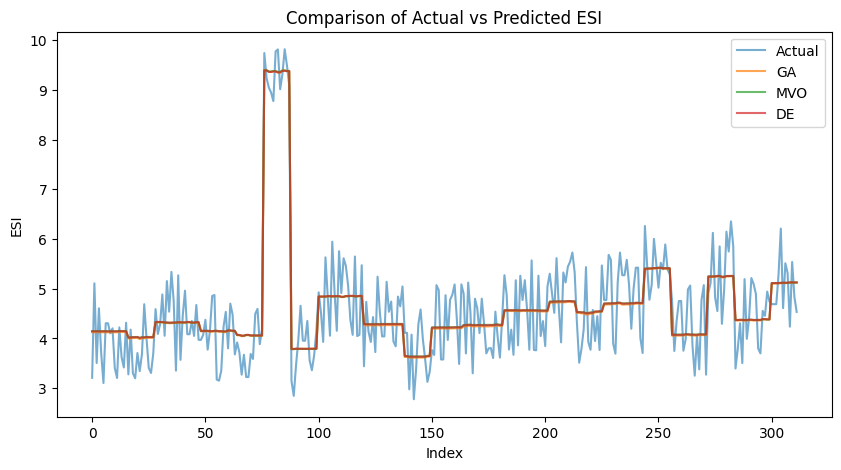

In [236]:
plt.figure(figsize=(10,5))
plt.plot(actual_ESI, label='Actual',alpha = 0.6)
plt.plot(predicted_ESI_GA, label= first,alpha = 0.7)
plt.plot(predicted_ESI_MVO, label= second,alpha = 0.7)
plt.plot(predicted_ESI_DE, label=third,alpha = 0.7)
plt.legend()
plt.xlabel("Index")  
plt.ylabel("ESI")  
plt.title("Comparison of Actual vs Predicted ESI")  
plt.show()


In [237]:
r2 = r2_score(actual_ESI,predicted_ESI_DE)
print(f"DE r2 score is: {r2}")

DE r2 score is: 0.7626868555381122
